# Projekat 1

## Importovanje biblioteka

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.utils import resample
from sklearn.feature_selection import chi2, SelectKBest, RFE

## Učitavanje podataka

In [2]:
df = pd.read_csv("data/bank-additional-full.csv", sep=';')
pd.set_option('display.max_columns', len(list(df.columns)) * 3)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Analiziranje podataka

Atributi koje ovaj skup podataka sadrzi su sledeći<br>

Podaci o klijentu:<br>
age = godine<br>
job = posao<br>
martial = bračni status<br>
education = obrazovanje<br>
default = neizmireni kredit<br>
housing = stambeni kredit<br>
loan = lični kredit<br>
<br>
Podaci o kontaktu sa klijentom:<br>
contact = način razgovora sa osobom (mobilni ili fiksni..)<br>
month = mesec u kojem je poslednji put razgovarano sa klijentom<br>
day_of_week = dan u mesecu u kojem je poslednji pud razgovarano sa klijentom<br>
duration = trajanje poslednjeg razgovora<br>
campaign = koliko je puta klijent pozvan za vreme ove kampanje<br>
pdays = broj dana koji je prošao od kontaktiranja osobe za prethodnu kampanju<br>
previous = broj poziva ka ovoj osobi pre ove kampanje<br>
poutcome = kakav je rezultat bio nakon prosle kampanje<br>
<br>
Atributi društvenog i ekonomskog konteksta<br>
emp.var.rate = procenat zapošljenih ljudi od ukupne populacije (stopa varijacije zaposlenosti).<br>
cons.price.idx = Indeksi potrošačkih cena (mere promene cena proizvoda i usluga koje domaćinstva nabavljaju za zadovoljenje<br> svojih potreba). Ovi indeksi se koriste kao mera inflacije. Mesečni<br>
cons.conf.idx = indeks poverenja potrošača, mesečni<br>
euribor3m = prosečna kamatna stopa za 3 meseca<br>
nr.employed = broj zapošljenih - kvartalni indikator<br>
<br>
Izlazni atribut<br>
y = subskrajbovan ili ne<br>

In [3]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [5]:
df.groupby("y").mean()

C:\Users\Stevan\AppData\Local\Temp\ipykernel_16900\2294615298.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("y").mean()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
yes,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [6]:
df.groupby("y").median()

C:\Users\Stevan\AppData\Local\Temp\ipykernel_16900\2385672884.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("y").median()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,38.0,163.5,2.0,999.0,0.0,1.1,93.918,-41.8,4.857,5195.8
yes,37.0,449.0,2.0,999.0,0.0,-1.8,93.200,-40.4,1.266,5099.1


In [7]:
df.groupby("job").median()

C:\Users\Stevan\AppData\Local\Temp\ipykernel_16900\2328314985.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("job").median()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
job,,,,,,,,,,
admin.,36.0,175.0,2.0,999.0,0.0,1.1,93.444,-41.8,4.857,5195.8
blue-collar,39.0,186.0,2.0,999.0,0.0,1.1,93.918,-42.0,4.857,5191.0
entrepreneur,41.0,180.0,2.0,999.0,0.0,1.1,93.918,-42.0,4.856,5195.8
housemaid,45.0,175.5,2.0,999.0,0.0,1.1,93.918,-40.8,4.864,5195.8
management,42.0,181.0,2.0,999.0,0.0,1.1,93.444,-42.0,4.855,5193.4
retired,59.0,189.0,2.0,999.0,0.0,-1.1,93.444,-37.5,1.415,5099.1
self-employed,39.0,171.0,2.0,999.0,0.0,1.1,93.444,-41.8,4.857,5195.8
services,36.0,184.0,2.0,999.0,0.0,1.1,93.918,-42.0,4.857,5191.0
student,25.0,209.0,2.0,999.0,0.0,-1.8,93.075,-40.8,1.262,5099.1


In [8]:
df.groupby("marital").median()

C:\Users\Stevan\AppData\Local\Temp\ipykernel_16900\2052485883.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("marital").median()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
marital,,,,,,,,,,
divorced,44.0,179.5,2.0,999.0,0.0,1.1,93.918,-42.0,4.8570,5195.8
married,41.0,179.0,2.0,999.0,0.0,1.1,93.918,-41.8,4.8570,5191.0
single,32.0,182.0,2.0,999.0,0.0,1.1,93.444,-42.0,4.8550,5191.0
unknown,35.5,210.0,2.0,999.0,0.0,0.5,93.444,-41.8,4.4875,5191.0


In [9]:
df.groupby('education').mean()

C:\Users\Stevan\AppData\Local\Temp\ipykernel_16900\3302629362.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('education').mean()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
education,,,,,,,,,,
basic.4y,47.596504,264.827826,2.600575,965.704981,0.147031,0.215924,93.658309,-40.239871,3.751768,5170.124880
basic.6y,40.448953,264.414485,2.556283,980.368237,0.129145,0.231152,93.650062,-41.127880,3.772942,5174.718063
basic.9y,39.061208,261.291811,2.532341,979.133168,0.141439,0.159239,93.623399,-41.326749,3.697963,5172.294012
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509


In [10]:
df.mode()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,31.0,admin.,married,university.degree,no,yes,no,cellular,may,thu,85,1.0,999.0,0.0,nonexistent,1.4,93.994,-36.4,4.857,5228.1,no
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.groupby(["job","y"]).size().to_frame()

0
job           y        
admin.        no   9070
              yes  1352
blue-collar   no   8616
              yes   638
entrepreneur  no   1332
              yes   124
housemaid     no    954
              yes   106
management    no   2596
              yes   328
retired       no   1286
              yes   434
self-employed no   1272
              yes   149
services      no   3646
              yes   323
student       no    600
              yes   275
technician    no   6013
              yes   730
unemployed    no    870
              yes   144
unknown       no    293
              yes    37

In [12]:
print('check 1: ', df.groupby(['loan','y']).size())
print('\n\ncheck 2: ', df.groupby(['job','y']).size())
print('\n\ncheck 3: ', df.groupby(['marital','y']).size())
print('\n\ncheck 4: ', df.groupby(['education','y']).size())
print('\n\ncheck 5: ', df.groupby(['poutcome','y']).size())
print('\n\ncheck 6: ', df.groupby(['month','y']).size())
print('\n\ncheck 7: ', df.groupby(['y', 'default']).size())

check 1:  loan     y  
no       no     30100
         yes     3850
unknown  no       883
         yes      107
yes      no      5565
         yes      683
dtype: int64


check 2:  job            y  
admin.         no     9070
               yes    1352
blue-collar    no     8616
               yes     638
entrepreneur   no     1332
               yes     124
housemaid      no      954
               yes     106
management     no     2596
               yes     328
retired        no     1286
               yes     434
self-employed  no     1272
               yes     149
services       no     3646
               yes     323
student        no      600
               yes     275
technician     no     6013
               yes     730
unemployed     no      870
               yes     144
unknown        no      293
               yes      37
dtype: int64


check 3:  marital   y  
divorced  no      4136
          yes      476
married   no     22396
          yes     2532
single    no      9948

## Vizuelizacija podataka

Procenat neprihvaćenih i prihvaćenih ponuda
 y
no     88.734583
yes    11.265417
Name: y, dtype: float64


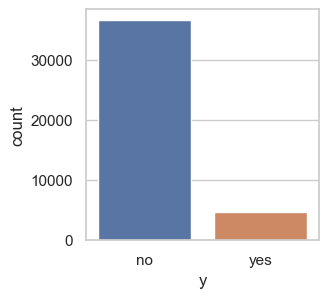

In [13]:
print("Procenat neprihvaćenih i prihvaćenih ponuda\n",df.groupby("y")["y"].count()/len(df)*100)
fig, ax = plt.subplots(figsize=(3,3))
sns.countplot(data=df, x = "y", ax=ax);

Zaključak je da je dataset poprilično nebalansiran i stoga kao meru efikasnosti nije moguće koristiti (accuracy), već je potrebno koristiti kombinovanu f meru ili područje ispod ROC krive

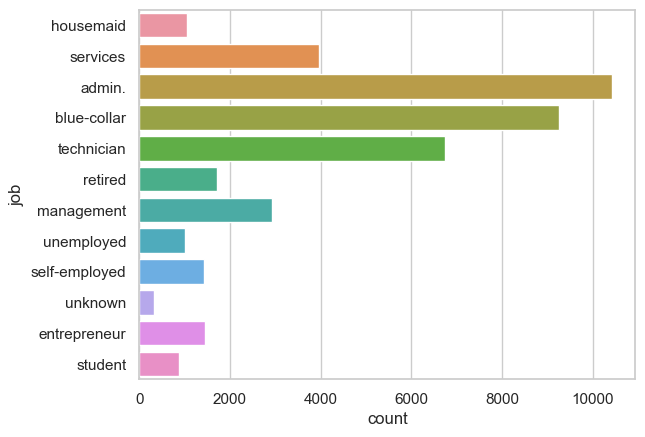

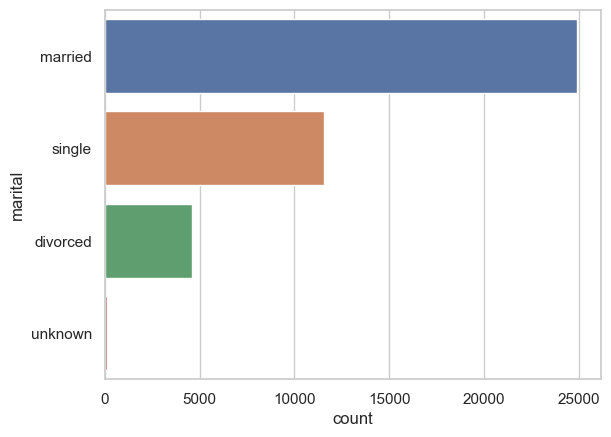

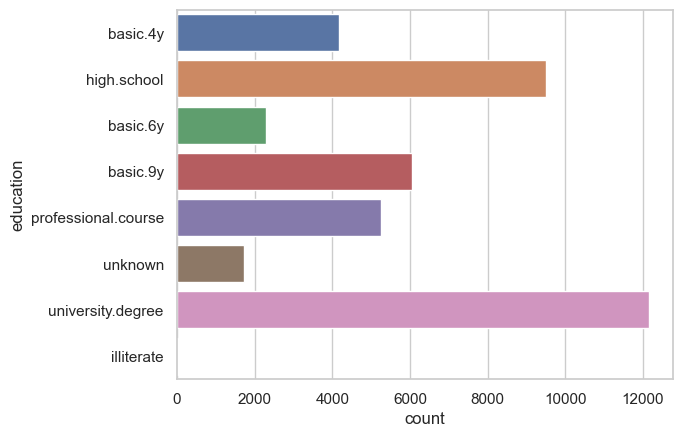

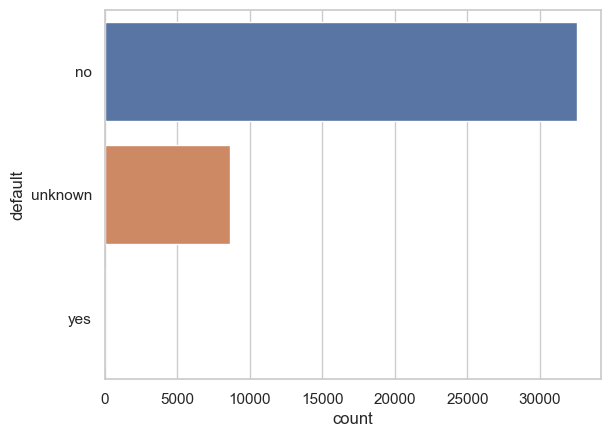

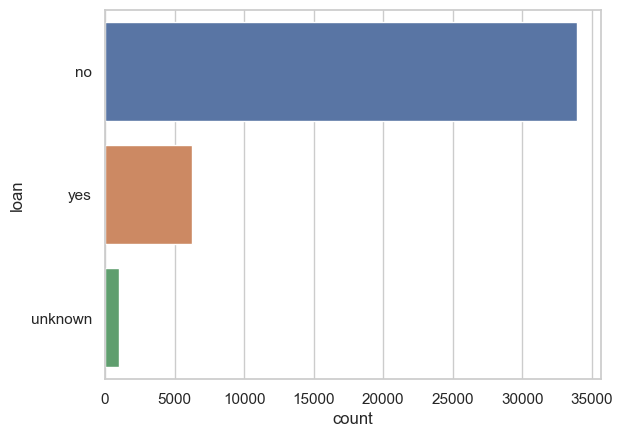

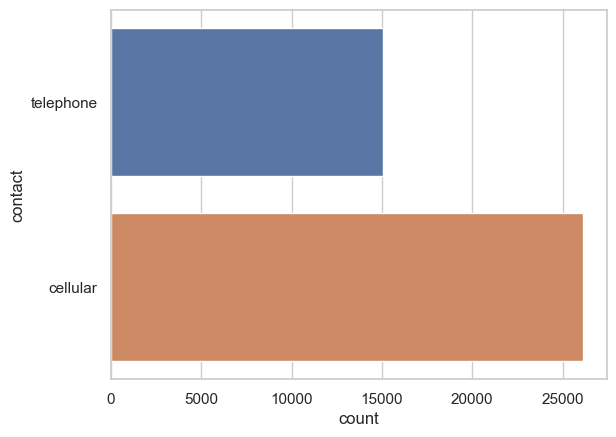

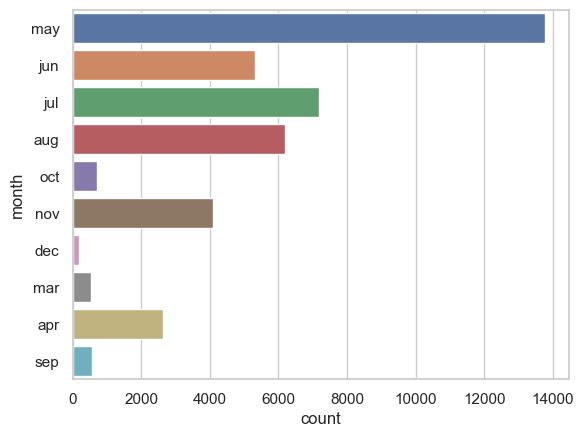

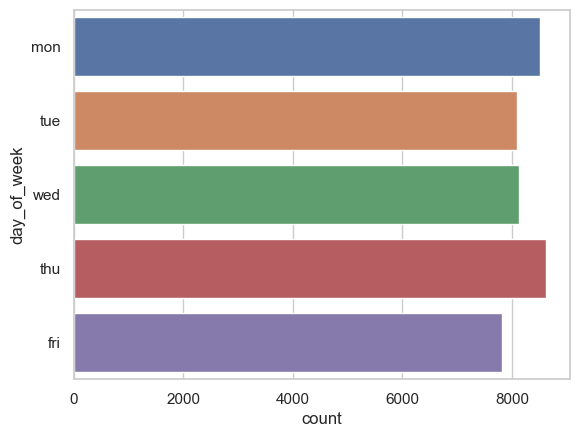

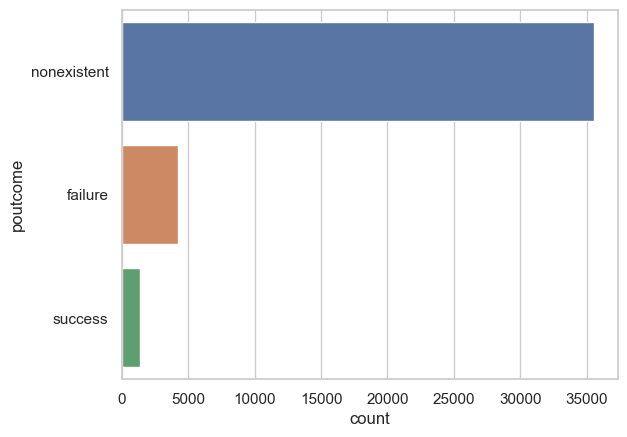

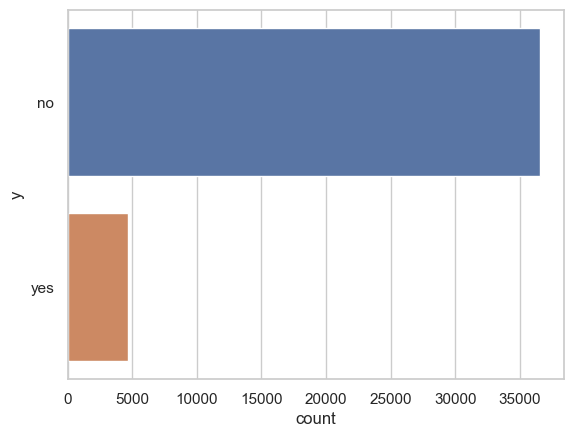

In [14]:
kategoricki_atributi = ['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'day_of_week', 'poutcome','y']
for a in kategoricki_atributi:
    fig, ax = plt.subplots();
    sns.countplot(data=df, y=a, ax=ax);

In [15]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


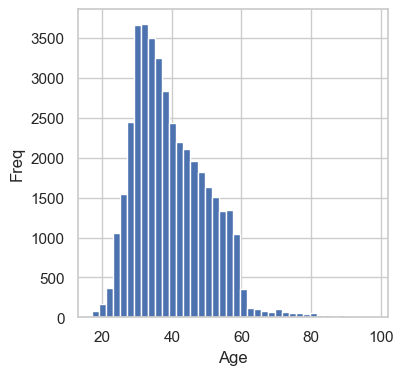

In [16]:
fig, ax = plt.subplots(figsize=(4,4))
ax.set_xlabel("Age")
ax.set_ylabel("Freq")
df["age"].hist(bins=40, ax=ax);

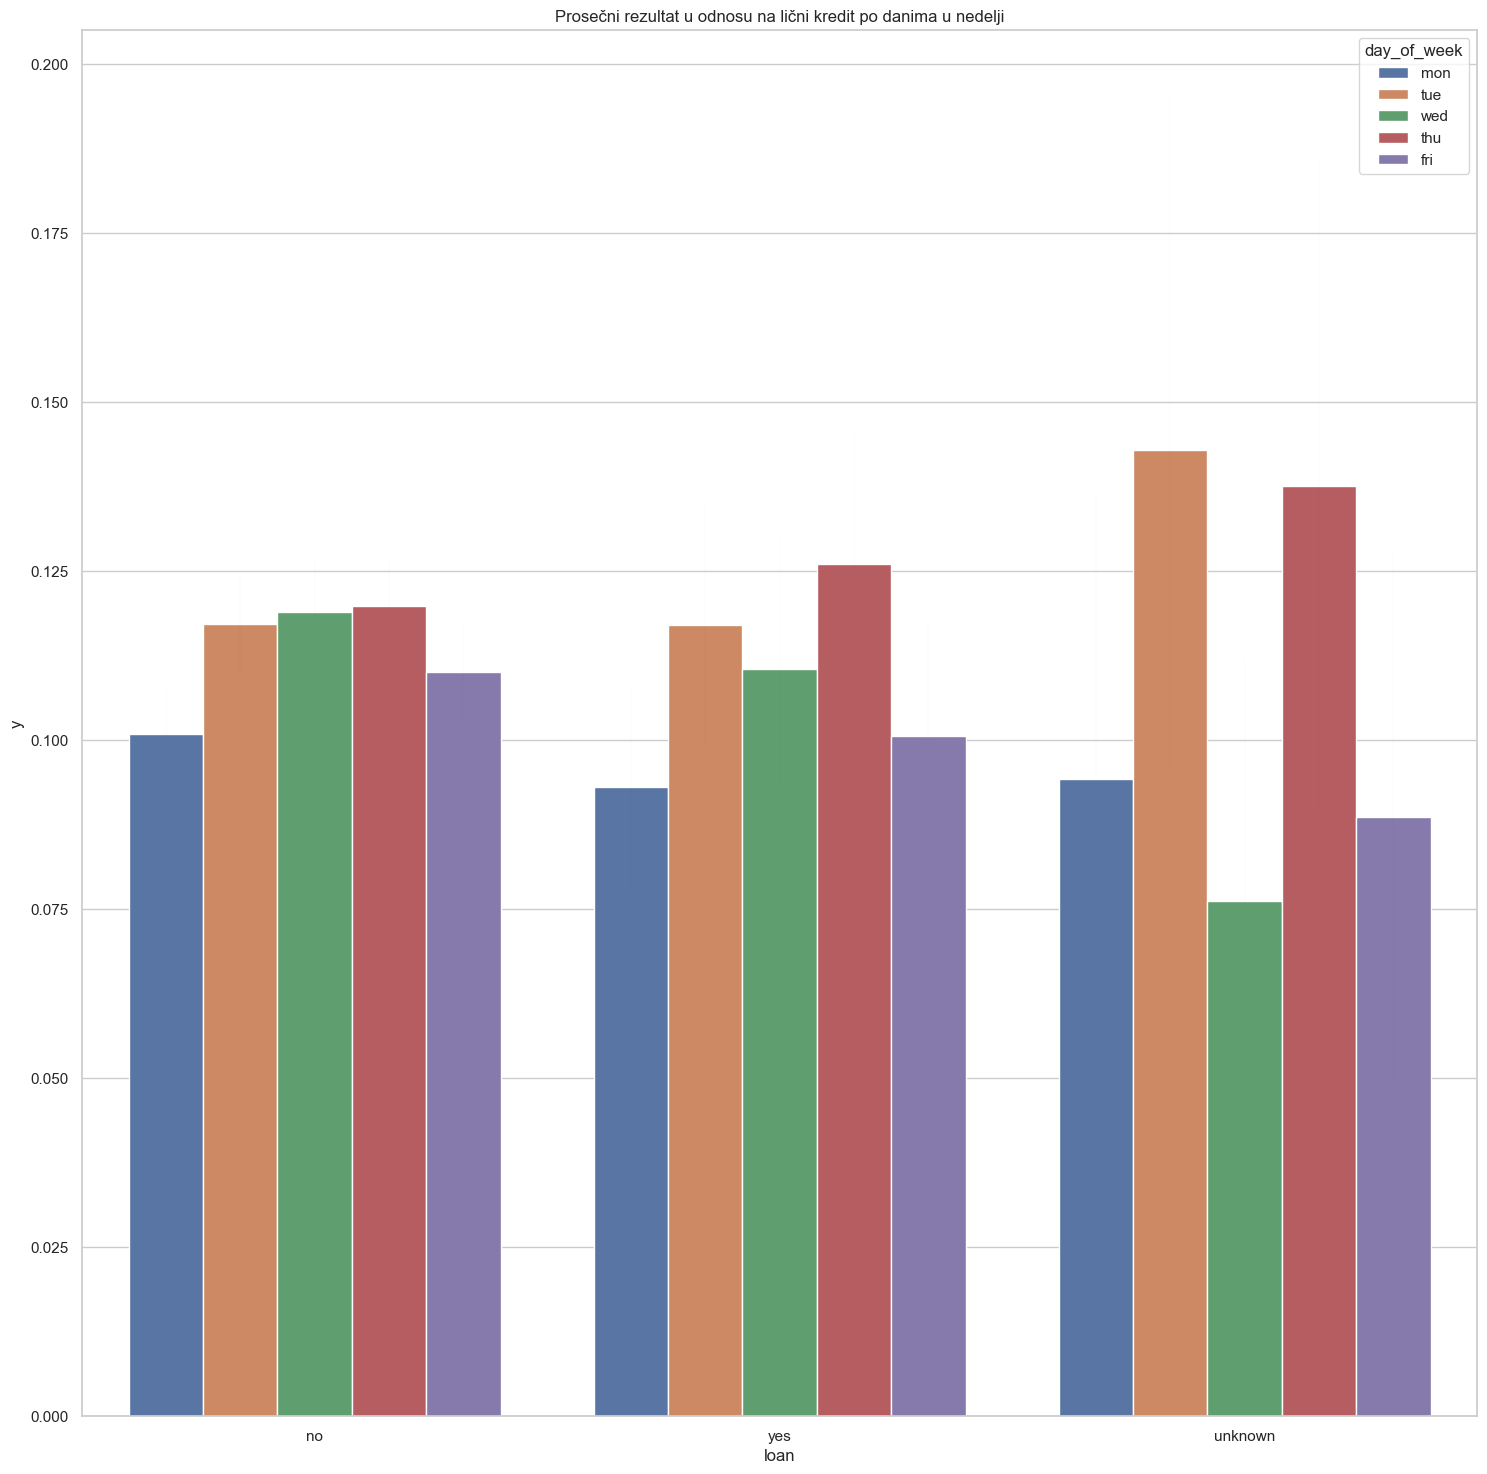

In [17]:
#pretvaranje kategorickog odredisnog atributa u numericki (0,1)
label_encoder = LabelEncoder()
label_encoder.fit(df["y"])
df["y"] = label_encoder.transform(df["y"])

fig, ax = plt.subplots(figsize=(18,18))
sns.barplot(x = 'loan', y = 'y', hue = 'day_of_week', data = df, errwidth = 0.01, ax=ax)
plt.title('Prosečni rezultat u odnosu na lični kredit po danima u nedelji');

In [18]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


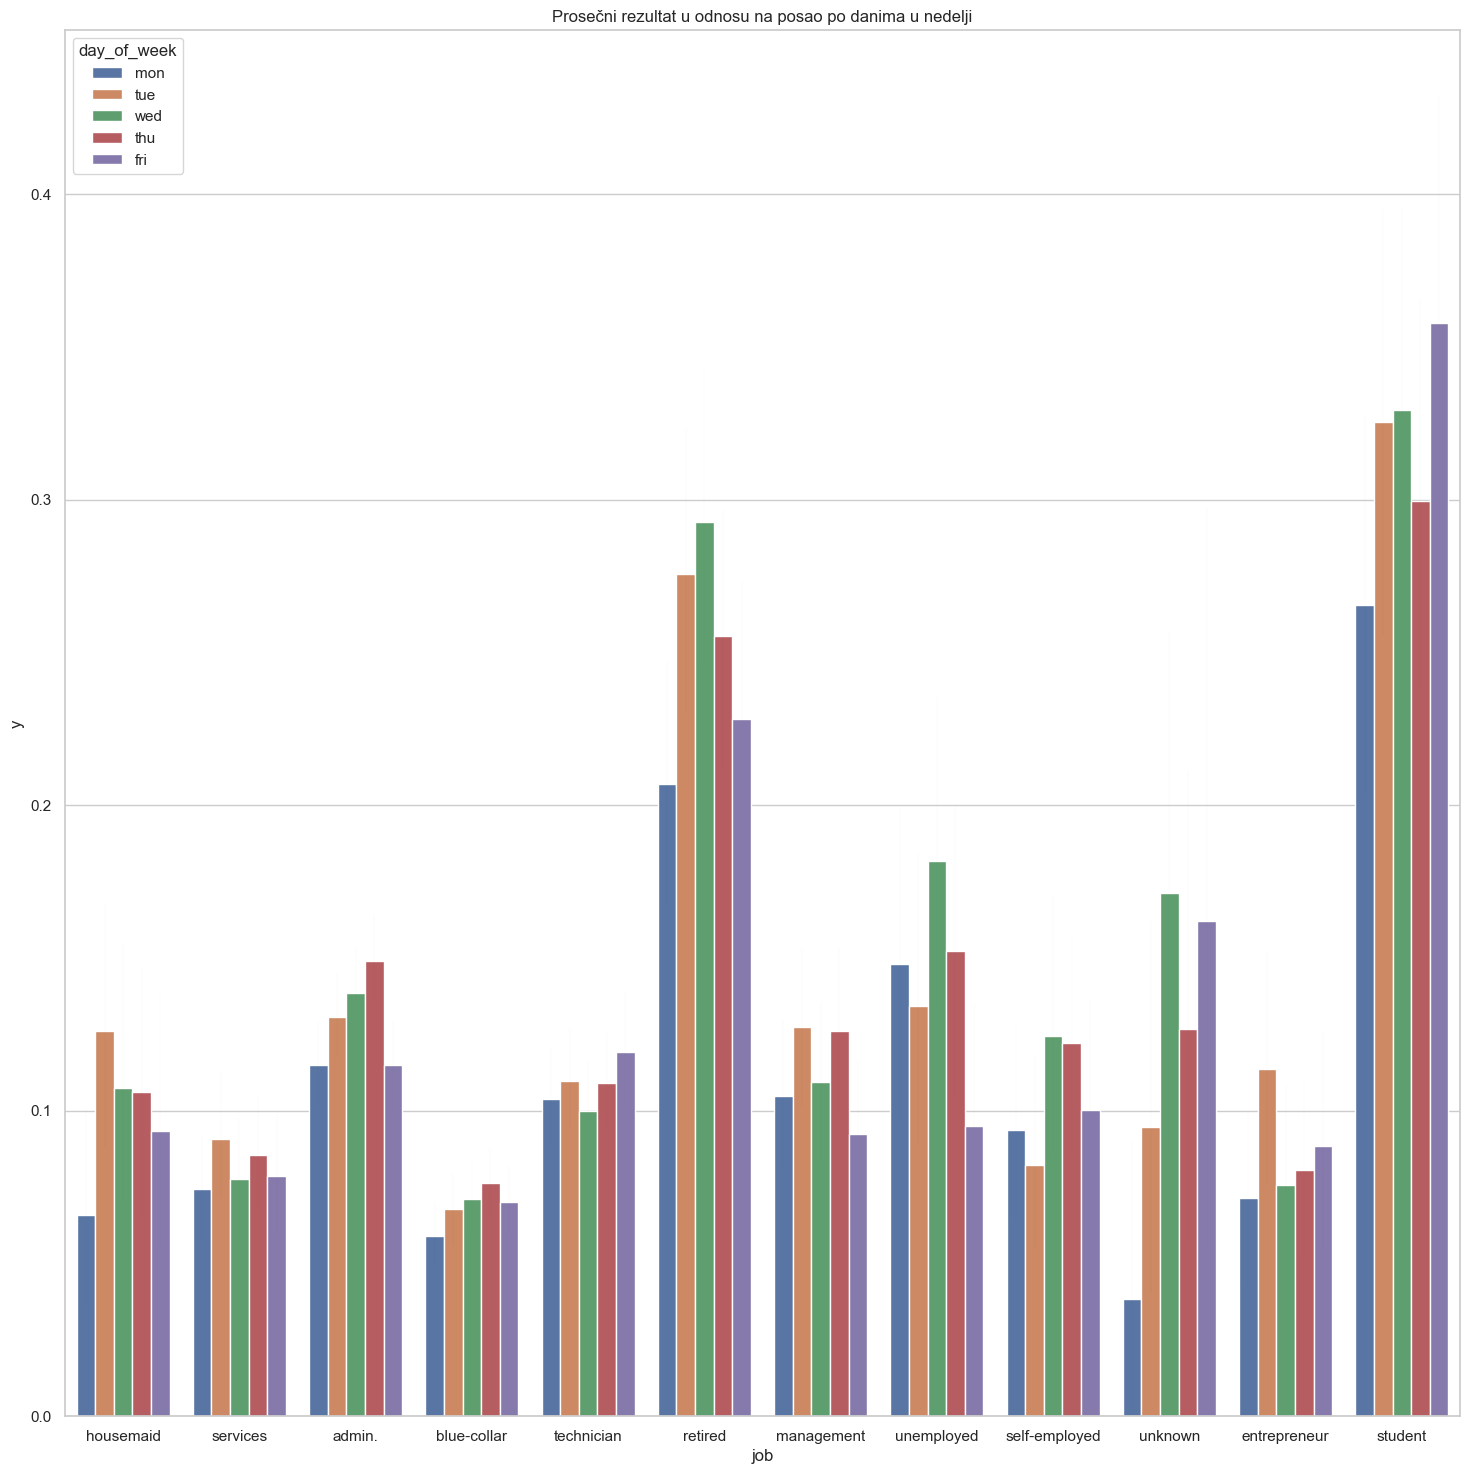

In [19]:
fig, ax = plt.subplots(figsize=(18,18))
sns.barplot(x = 'job', y = 'y', hue = 'day_of_week', data = df, errwidth = 0.01, ax=ax)
plt.title('Prosečni rezultat u odnosu na posao po danima u nedelji');

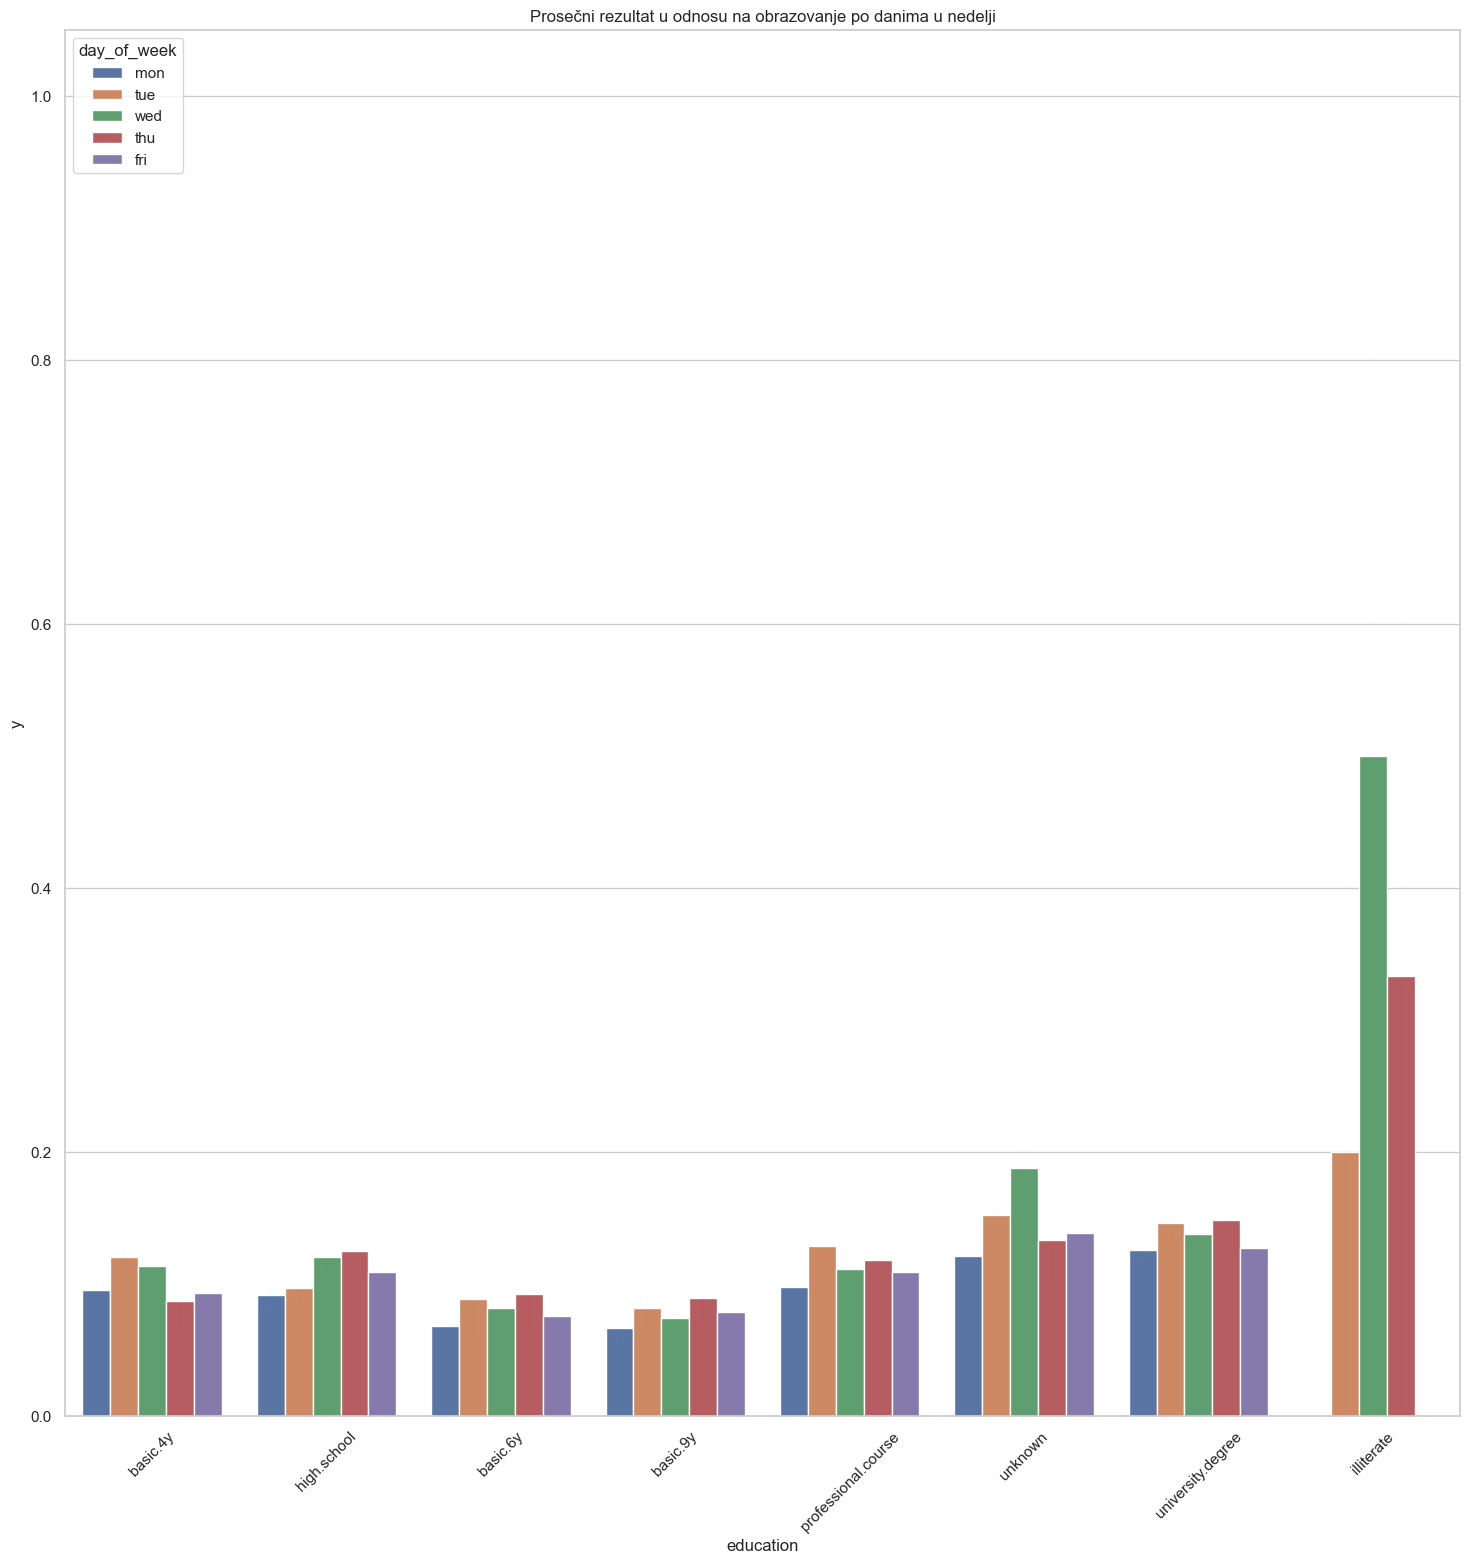

In [20]:
fig, ax = plt.subplots(figsize=(18,18))
sns.barplot(x = 'education', y = 'y', hue = 'day_of_week', data = df, errwidth = 0.01, ax=ax)
plt.title('Prosečni rezultat u odnosu na obrazovanje po danima u nedelji')
plt.xticks(rotation=45);

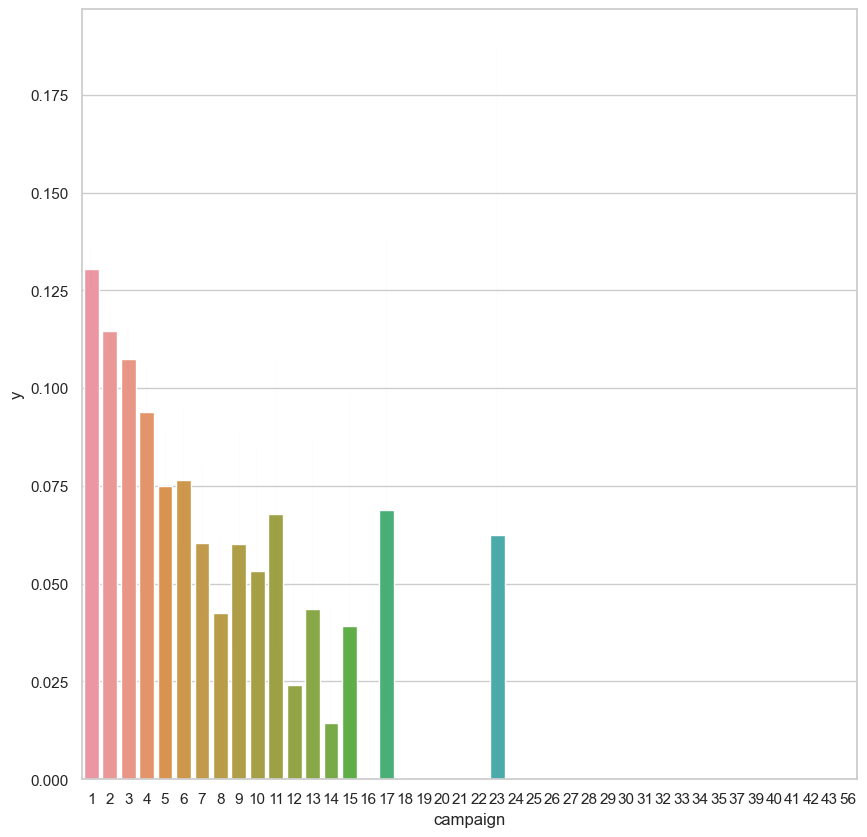

In [21]:
# uspeh u zavisnosti od toga koliko je klijent puta pozvan

fig, ax = plt.subplots(figsize=(10,10))

sns.barplot(data=df, x="campaign", y="y", errwidth=0.01);

y                0     1
poutcome                
failure       3647   605
nonexistent  32422  3141
success        479   894


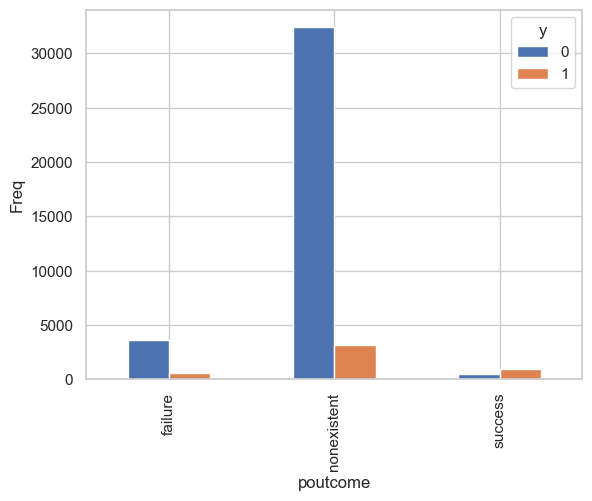

In [22]:
print(pd.crosstab(df.poutcome, df.y))
pd.crosstab(df.poutcome, df.y).plot(kind="bar", ylabel="Freq");

## Transformacija i uklanjanje atributa

In [23]:
#binarni atributi, zbog toga je u redu koristiti label_encoder
labels = ['housing', 'default', 'loan']
for label in labels:
    label_encoder = LabelEncoder()
    label_encoder.fit(df[label])
    df[label] = label_encoder.transform(df[label])
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,0,0,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,1,0,0,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0,2,0,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0,0,0,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0,0,2,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


C:\Users\Stevan\AppData\Local\Temp\ipykernel_16900\401770300.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


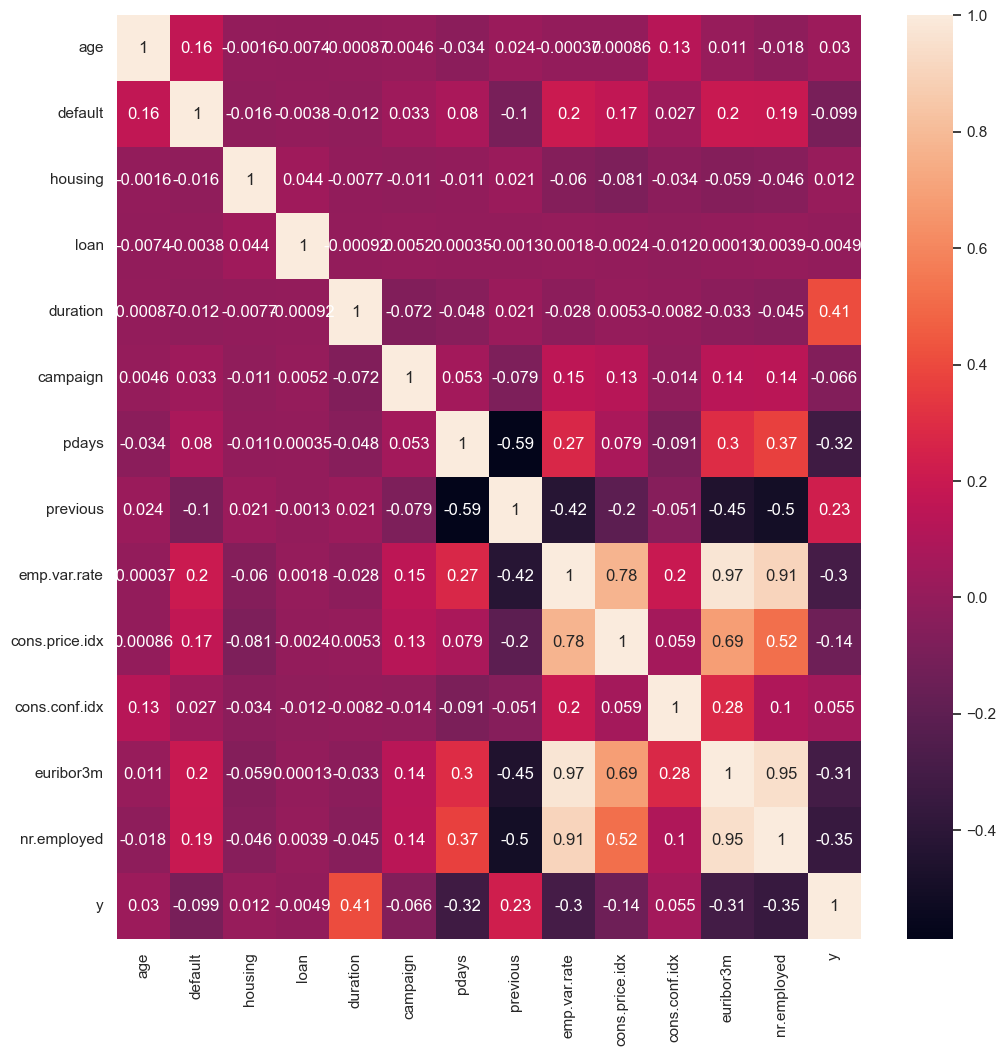

In [24]:
df_corr = df.corr()
fig, ax = plt.subplots(figsize = (12,12))
sns.heatmap(data=df_corr, annot=True, ax=ax);

Vidimo da postoji visoka korelacija između sledećih atributa (euribor3m - emp.var.rate), (nr.employed - emp.var.rate), (cons.price.idx - emp.var.rate), (nr.employed - euribor), (cons.price.idx - euribor3m).
Ovo direktno ukazuje na to da postoji neka vrsta linearne povezanosti između ovih atributa. Samim tim, ovo je prilika da se redukuje broj atributa.

Shodno ovome, odstranićemo sledeće atribute:
emp.var.rate, nr.employed, cons.price.idx

In [25]:
konacni_df = df.drop(["emp.var.rate", "nr.employed", "cons.price.idx"], axis=1)
konacni_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.conf.idx,euribor3m,y
0,56,housemaid,married,basic.4y,0,0,0,telephone,may,mon,261,1,999,0,nonexistent,-36.4,4.857,0
1,57,services,married,high.school,1,0,0,telephone,may,mon,149,1,999,0,nonexistent,-36.4,4.857,0
2,37,services,married,high.school,0,2,0,telephone,may,mon,226,1,999,0,nonexistent,-36.4,4.857,0
3,40,admin.,married,basic.6y,0,0,0,telephone,may,mon,151,1,999,0,nonexistent,-36.4,4.857,0
4,56,services,married,high.school,0,0,2,telephone,may,mon,307,1,999,0,nonexistent,-36.4,4.857,0


C:\Users\Stevan\AppData\Local\Temp\ipykernel_16900\2491148191.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr_konacni = konacni_df.corr()


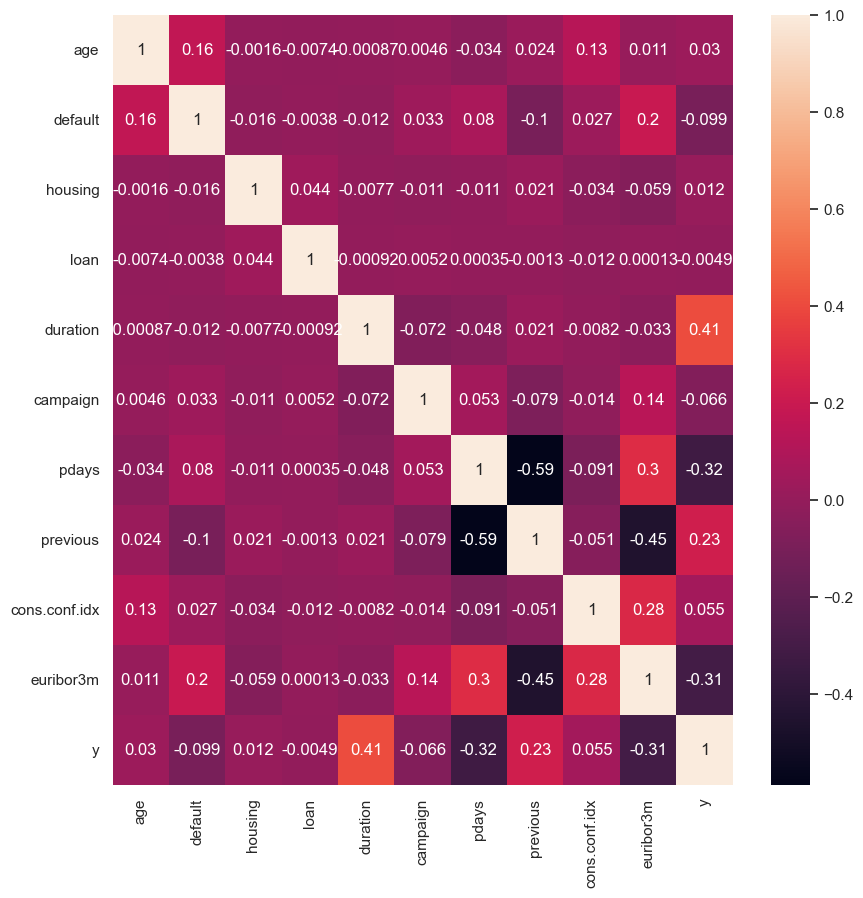

In [26]:
df_corr_konacni = konacni_df.corr()
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(data=df_corr_konacni, annot=True, ax=ax);

In [27]:
#Uklanjanje duplikata
dups = konacni_df.duplicated()
print("Broj duplikata pre brisanja:", dups.sum())
konacni_df.drop_duplicates(inplace=True)
print("Broj duplikata posle brisanja:", konacni_df.duplicated().sum())

Broj duplikata pre brisanja: 12
Broj duplikata posle brisanja: 0


In [28]:
cols = ['job', 'contact', 'marital','education', 'poutcome', 'month', 'day_of_week']
konacni_df = pd.get_dummies(data=konacni_df, columns=cols)
konacni_df.head()

,age,default,housing,loan,duration,campaign,pdays,previous,cons.conf.idx,euribor3m,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_cellular,contact_telephone,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,poutcome_failure,poutcome_nonexistent,poutcome_success,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,56,0,0,0,261,1,999,0,-36.4,4.857,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,57,1,0,0,149,1,999,0,-36.4,4.857,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,37,0,2,0,226,1,999,0,-36.4,4.857,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,40,0,0,0,151,1,999,0,-36.4,4.857,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,56,0,0,2,307,1,999,0,-36.4,4.857,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [29]:
konacni_df.dtypes

age                                int64
default                            int32
housing                            int32
loan                               int32
duration                           int64
campaign                           int64
pdays                              int64
previous                           int64
cons.conf.idx                    float64
euribor3m                        float64
y                                  int32
job_admin.                         uint8
job_blue-collar                    uint8
job_entrepreneur                   uint8
job_housemaid                      uint8
job_management                     uint8
job_retired                        uint8
job_self-employed                  uint8
job_services                       uint8
job_student                        uint8
job_technician                     uint8
job_unemployed                     uint8
job_unknown                        uint8
contact_cellular                   uint8
contact_telephon

In [30]:
konacni_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41176.0,40.023800,10.420680,17.000,32.000,38.000,47.000,98.000
default,41176.0,0.208908,0.406713,0.000,0.000,0.000,0.000,2.000
housing,41176.0,1.071789,0.985305,0.000,0.000,2.000,2.000,2.000
loan,41176.0,0.327521,0.723700,0.000,0.000,0.000,0.000,2.000
duration,41176.0,258.315815,259.305321,0.000,102.000,180.000,319.000,4918.000
campaign,41176.0,2.567879,2.770318,1.000,1.000,2.000,3.000,56.000
pdays,41176.0,962.464810,186.937102,0.000,999.000,999.000,999.000,999.000
previous,41176.0,0.173013,0.494964,0.000,0.000,0.000,0.000,7.000
cons.conf.idx,41176.0,-40.502863,4.627860,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41176.0,3.621293,1.734437,0.634,1.344,4.857,4.961,5.045


## Normalizacija atributa

In [31]:
labels = konacni_df.y
scaler = MinMaxScaler()
normalizovani_df = pd.DataFrame(scaler.fit_transform(konacni_df.drop(['y'], axis = 1)), columns = konacni_df.drop(['y'], axis = 1).columns)

In [32]:
normalizovani_df.head()

,age,default,housing,loan,duration,campaign,pdays,previous,cons.conf.idx,euribor3m,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_cellular,contact_telephone,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,poutcome_failure,poutcome_nonexistent,poutcome_success,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,0.481481,0.0,0.0,0.0,0.053070,0.0,1.0,0.0,0.60251,0.957379,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.493827,0.5,0.0,0.0,0.030297,0.0,1.0,0.0,0.60251,0.957379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.246914,0.0,1.0,0.0,0.045954,0.0,1.0,0.0,0.60251,0.957379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.283951,0.0,0.0,0.0,0.030704,0.0,1.0,0.0,0.60251,0.957379,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.481481,0.0,0.0,1.0,0.062424,0.0,1.0,0.0,0.60251,0.957379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Podela podakata na trening i test skup

In [33]:
X = normalizovani_df

y = konacni_df["y"]

X.shape[0], y.shape[0]

(41176, 41176)

In [34]:
y.head(), y.value_counts()

(0    0
 1    0
 2    0
 3    0
 4    0
 Name: y, dtype: int32,
 0    36537
 1     4639
 Name: y, dtype: int64)

In [35]:
# izbor algoritma cross validacije
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 1)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((32940, 54), (8236, 54), (32940,), (8236,))

Kreiranje testing dataseta, koji će služiti za upoređivanje primenjenih algoritama

In [37]:
testing = pd.DataFrame(columns=["Algoritam", "Kombinovana f mera", "Područje ispod ROC krive", "Accuracy"])
testing

,Algoritam,Kombinovana f mera,Područje ispod ROC krive,Accuracy


## Random Forest Classifier
Inicijalni rezultati, bez podesavanja bilo kakvih parametara

In [38]:
np.random.seed(42)
model_rfc_bez_parametara = RandomForestClassifier()
model_rfc_bez_parametara.fit(X_train, y_train)

pred = model_rfc_bez_parametara.predict(X_test)
f1 = f1_score(y_test, model_rfc_bez_parametara.predict(X_test))
auc = roc_auc_score(y_test, model_rfc_bez_parametara.predict(X_test))
acc = accuracy_score(y_test, model_rfc_bez_parametara.predict(X_test))

print("Kombinovana F mera je : %0.3f" %f1)
print("Podrucje ispod ROC krive je: %0.3f" %auc)
print("Accuracy je: %0.3f" %acc)

testing.loc[-1] = ["Random Forest bez podešavanja hiperparametara", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

Kombinovana F mera je : 0.542
Podrucje ispod ROC krive je: 0.718
Accuracy je: 0.910


In [39]:
testing

,Algoritam,Kombinovana f mera,Područje ispod ROC krive,Accuracy
0,Random Forest bez podešavanja hiperparametara,0.541615,0.717524,0.910393


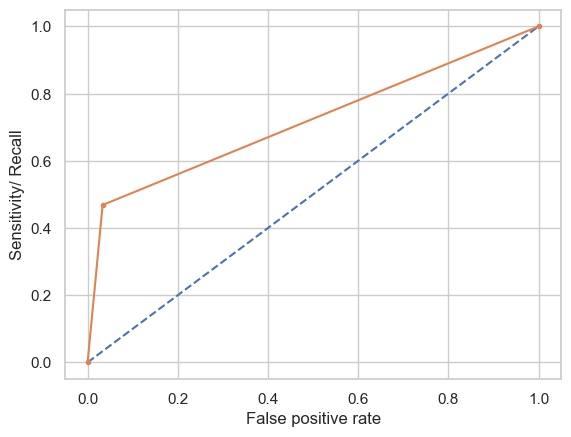

In [40]:
fpr, tpr, thresholds = roc_curve(y_test, pred)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('Sensitivity/ Recall')
# show the plot
plt.show()

## Random Forest Classifier
Sa podešavanjem hiperparametara

In [41]:
np.random.seed(42)
# Podešavanje hiperparametara i kreiranje modela
params = {
            "n_estimators" : [100, 200], 
            "criterion" : ["gini", "entropy"], 
            "max_depth" : [15, 25, None],
            "min_samples_split" : [3, 6], 
            "min_samples_leaf" : [2, 4]
}
model_rfc_sa_parametrima = GridSearchCV(estimator = RandomForestClassifier(class_weight = "balanced", n_jobs = -1), param_grid = params, cv = cv, 
                   n_jobs = -1, scoring = "f1")
model_rfc_sa_parametrima.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [15, 25, None],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [3, 6],
                         'n_estimators': [100, 200]},
             scoring='f1')

In [42]:
f1_score(y_test, model_rfc_sa_parametrima.predict(X_test))

0.644343891402715

In [43]:
model_rfc_sa_parametrima.best_params_

{'criterion': 'gini',
 'max_depth': 25,
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 200}

In [44]:
model_rfc_sa_parametrima.best_score_

0.6493776966686287

In [45]:
f1 = f1_score(y_test, model_rfc_sa_parametrima.predict(X_test))
auc = roc_auc_score(y_test, model_rfc_sa_parametrima.predict(X_test))
acc = accuracy_score(y_test, model_rfc_sa_parametrima.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Random Forest sa podešenim hiperparametrima", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.644
Area under ROC on test data is : 0.844
Accuracy on test data is : 0.905


In [46]:
testing

,Algoritam,Kombinovana f mera,Područje ispod ROC krive,Accuracy
0,Random Forest sa podešenim hiperparametrima,0.644344,0.843575,0.904565
1,Random Forest bez podešavanja hiperparametara,0.541615,0.717524,0.910393


## Logistic Regression
inicijalni rezultati, bez podešavanja bilo kakvih parametara

In [47]:
np.random.seed(42)
model_lr_bez_parametara = LogisticRegression()
model_lr_bez_parametara.fit(X_train, y_train)

pred = model_lr_bez_parametara.predict(X_test)
f1 = f1_score(y_test, model_lr_bez_parametara.predict(X_test))
auc = roc_auc_score(y_test, model_lr_bez_parametara.predict(X_test))
acc = accuracy_score(y_test, model_lr_bez_parametara.predict(X_test))

print("Kombinovana F mera je : %0.3f" %f1)
print("Podrucje ispod ROC krive je: %0.3f" %auc)
print("Accuracy je: %0.3f" %acc)

testing.loc[-1] = ["Logistic Regression bez podešavanja hiperparametara", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

Kombinovana F mera je : 0.475
Podrucje ispod ROC krive je: 0.676
Accuracy je: 0.905


D:\ML_repo\ML_Projekat_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
testing

,Algoritam,Kombinovana f mera,Područje ispod ROC krive,Accuracy
0,Logistic Regression bez podešavanja hiperparam...,0.475168,0.676087,0.905051
1,Random Forest sa podešenim hiperparametrima,0.644344,0.843575,0.904565
2,Random Forest bez podešavanja hiperparametara,0.541615,0.717524,0.910393


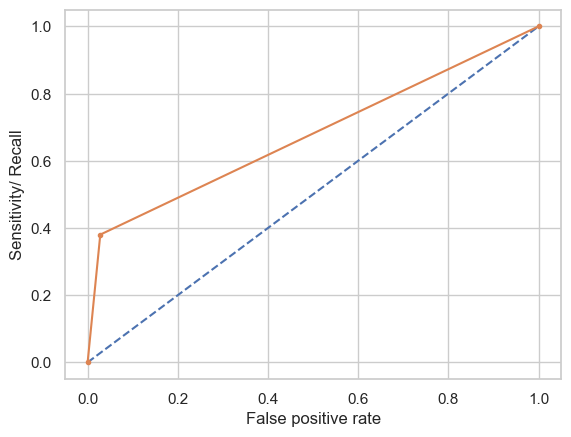

In [49]:
fpr, tpr, thresholds = roc_curve(y_test, pred)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('Sensitivity/ Recall')
# show the plot
plt.show()

## Logistic Regression
Sa podešavanjem hiperparametara

In [50]:
params2 = [
            {
                "penalty" : ['l2'], 
                "C" : [0.01, 0.1, 1.0, 10.0], 
                "solver" : ["sag"], 
                "max_iter" : [100, 200]
            },
            {
                "penalty" : ['l1'], 
                "C" : [0.01, 0.1, 1.0, 10.0], 
                "solver" : ["saga"], 
                "max_iter" : [100, 200]
            }
]
model_lr_sa_parametrima = GridSearchCV(estimator = LogisticRegression(n_jobs = -1, class_weight = "balanced"), param_grid = params2, cv = cv, 
                   n_jobs = -1, scoring = "f1")
model_lr_sa_parametrima.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced', n_jobs=-1),
             n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1.0, 10.0], 'max_iter': [100, 200],
                          'penalty': ['l2'], 'solver': ['sag']},
                         {'C': [0.01, 0.1, 1.0, 10.0], 'max_iter': [100, 200],
                          'penalty': ['l1'], 'solver': ['saga']}],
             scoring='f1')

In [51]:
model_lr_sa_parametrima.best_params_

{'C': 1.0, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}

In [52]:
model_lr_sa_parametrima.best_score_

0.5900964784809783

In [53]:
f1 = f1_score(y_test, model_lr_sa_parametrima.predict(X_test))
auc = roc_auc_score(y_test, model_lr_sa_parametrima.predict(X_test))
acc = accuracy_score(y_test, model_lr_sa_parametrima.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Logistic Regression sa parametrima", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.581
Area under ROC on test data is : 0.860
Accuracy on test data is : 0.860


In [54]:
testing

,Algoritam,Kombinovana f mera,Područje ispod ROC krive,Accuracy
0,Logistic Regression sa parametrima,0.580762,0.859557,0.859762
1,Logistic Regression bez podešavanja hiperparam...,0.475168,0.676087,0.905051
2,Random Forest sa podešenim hiperparametrima,0.644344,0.843575,0.904565
3,Random Forest bez podešavanja hiperparametara,0.541615,0.717524,0.910393


## Decision Tree
inicijalni rezultati, bez podešavanja bilo kakvih parametara

In [55]:
np.random.seed(42)
model_dt_bez_parametara = DecisionTreeClassifier()
model_dt_bez_parametara.fit(X_train, y_train)

pred = model_dt_bez_parametara.predict(X_test)
f1 = f1_score(y_test, model_dt_bez_parametara.predict(X_test))
auc = roc_auc_score(y_test, model_dt_bez_parametara.predict(X_test))
acc = accuracy_score(y_test, model_dt_bez_parametara.predict(X_test))

print("Kombinovana F mera je : %0.3f" %f1)
print("Podrucje ispod ROC krive je: %0.3f" %auc)
print("Accuracy je: %0.3f" %acc)

testing.loc[-1] = ["Decision Tree bez podešavanja hiperparametara", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

Kombinovana F mera je : 0.546
Podrucje ispod ROC krive je: 0.751
Accuracy je: 0.893


In [56]:
testing

,Algoritam,Kombinovana f mera,Područje ispod ROC krive,Accuracy
0,Decision Tree bez podešavanja hiperparametara,0.545549,0.750585,0.893395
1,Logistic Regression sa parametrima,0.580762,0.859557,0.859762
2,Logistic Regression bez podešavanja hiperparam...,0.475168,0.676087,0.905051
3,Random Forest sa podešenim hiperparametrima,0.644344,0.843575,0.904565
4,Random Forest bez podešavanja hiperparametara,0.541615,0.717524,0.910393


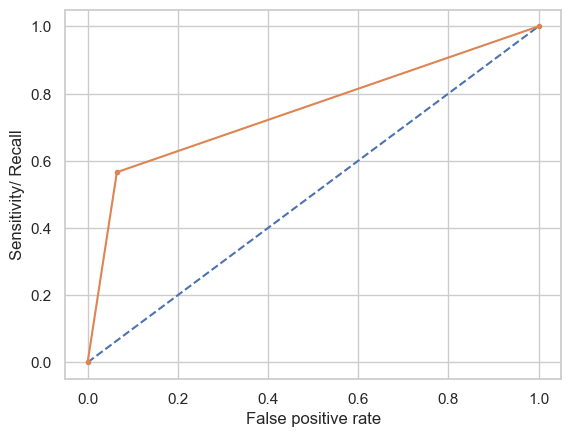

In [57]:
fpr, tpr, thresholds = roc_curve(y_test, pred)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('Sensitivity/ Recall')
# show the plot
plt.show()

## Decision Tree
Sa korišćenjem hiperparametara

In [58]:
np.random.seed(42)
params3 = {
            "criterion" : ["gini", "entropy"], 
            "splitter" : ["best", "random"], 
            "max_depth" : [20, 40, None],
            "min_samples_split" : [3, 6], 
            "min_samples_leaf" : [2, 4],  
        }
model_dt_sa_parametrima = GridSearchCV(estimator = DecisionTreeClassifier(class_weight = "balanced"), param_grid = params3, cv = cv, 
                   n_jobs = -1, scoring = "f1")
model_dt_sa_parametrima.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 40, None],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [3, 6],
                         'splitter': ['best', 'random']},
             scoring='f1')

In [59]:
model_dt_sa_parametrima.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'splitter': 'best'}

In [60]:
model_dt_sa_parametrima.best_score_

0.5825958191573897

In [61]:
f1 = f1_score(y_test, model_dt_sa_parametrima.predict(X_test))
auc = roc_auc_score(y_test, model_dt_sa_parametrima.predict(X_test))
acc = accuracy_score(y_test, model_dt_sa_parametrima.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Decision Tree sa hiperparametrima", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.572
Area under ROC on test data is : 0.819
Accuracy on test data is : 0.873


In [62]:
testing

,Algoritam,Kombinovana f mera,Područje ispod ROC krive,Accuracy
0,Decision Tree sa hiperparametrima,0.572250,0.819024,0.873482
1,Decision Tree bez podešavanja hiperparametara,0.545549,0.750585,0.893395
2,Logistic Regression sa parametrima,0.580762,0.859557,0.859762
3,Logistic Regression bez podešavanja hiperparam...,0.475168,0.676087,0.905051
4,Random Forest sa podešenim hiperparametrima,0.644344,0.843575,0.904565
5,Random Forest bez podešavanja hiperparametara,0.541615,0.717524,0.910393


## Gaussian Naive Bayes

In [63]:
model_gnb = GridSearchCV(estimator = GaussianNB(), param_grid = {}, cv = cv, n_jobs = -1, scoring = "f1")
model_gnb.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=GaussianNB(), n_jobs=-1, param_grid={}, scoring='f1')

In [64]:
model_gnb.best_params_

{}

In [65]:
model_gnb.best_score_

0.45605196047104873

In [66]:
f1 = f1_score(y_test, model_gnb.predict(X_test))
auc = roc_auc_score(y_test, model_gnb.predict(X_test))
acc = accuracy_score(y_test, model_gnb.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Gaussian Naive Bayes", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.434
Area under ROC on test data is : 0.687
Accuracy on test data is : 0.865


In [104]:
testing

,Algoritam,Kombinovana f mera,Područje ispod ROC krive,Accuracy
0,Gaussian Naive Bayes nad balansiranim skupom,0.638414,0.713639,0.714978
1,Logistic Regression nad balansiranim skupom,0.871159,0.871261,0.871228
2,Decision Tree nad balansiranim skupom,0.839176,0.844119,0.844289
3,Random forest nad balansiranim skupom,0.898191,0.894170,0.893858
4,Gaussian Naive Bayes,0.433673,0.686908,0.865226
5,Decision Tree sa hiperparametrima,0.572250,0.819024,0.873482
6,Decision Tree bez podešavanja hiperparametara,0.545549,0.750585,0.893395
7,Logistic Regression sa parametrima,0.580762,0.859557,0.859762
8,Logistic Regression bez podešavanja hiperparam...,0.475168,0.676087,0.905051
9,Random Forest sa podešenim hiperparametrima,0.644344,0.843575,0.904565


## Balansiranje dataseta
Korišćenjem undersamplinga

In [67]:
konacni_df_sa_y=normalizovani_df.copy()
konacni_df_sa_y["y"] = y.tolist()
konacni_df_sa_y["y"].isnull().any().sum()

0

In [68]:
prevladavajuca_klasa = konacni_df_sa_y[konacni_df_sa_y.y == 1].shape[0] > konacni_df_sa_y[konacni_df_sa_y.y == 0].shape[0]

In [69]:
df_prevladavajuca = konacni_df_sa_y[konacni_df_sa_y.y == prevladavajuca_klasa]
df_manje_zastupljena = konacni_df_sa_y[konacni_df_sa_y.y != prevladavajuca_klasa]

df_prevladavajuca.shape[0], df_manje_zastupljena.shape[0]

(36537, 4639)

In [70]:
df_prevladavajuca_undersampled = resample(df_prevladavajuca, 
                                           replace=False, # Ne želimo da dupliramo podatke
                                           n_samples=df_manje_zastupljena.shape[0], # Želimo da imamo jednak broj primera po klasama
                                           random_state=123) # Postavljamo seed za reprodukciju rezultata

df_prevladavajuca_undersampled.shape[0]

4639

In [71]:
df_undersampled = pd.concat([df_manje_zastupljena, df_prevladavajuca_undersampled])
df_undersampled.shape[0]

9278

In [72]:
# Shuffle podataka
df_undersampled = df_undersampled.sample(frac=1).reset_index(drop=True)

In [73]:
y_undersampled = df_undersampled["y"]

X_undersampled = df_undersampled.drop("y", axis=1)

In [74]:
X_undersampled_train, X_undersampled_test, y_undersampled_train, y_undersampled_test = train_test_split(X_undersampled, y_undersampled, test_size=0.2)

In [75]:
y_undersampled_train.isnull().any().sum()

0

In [76]:
X_undersampled.head()

,age,default,housing,loan,duration,campaign,pdays,previous,cons.conf.idx,euribor3m,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_cellular,contact_telephone,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,poutcome_failure,poutcome_nonexistent,poutcome_success,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,0.407407,0.0,0.0,0.0,0.143351,0.000000,1.000000,0.000000,0.368201,0.767853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.555556,0.0,1.0,0.0,0.066897,0.000000,1.000000,0.285714,0.000000,0.090002,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.283951,0.5,1.0,0.0,0.010573,0.000000,1.000000,0.000000,0.376569,0.980957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.456790,0.0,1.0,0.0,0.064457,0.090909,0.006006,0.142857,0.054393,0.080027,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.172840,0.0,1.0,0.0,0.058967,0.145455,1.000000,0.000000,0.615063,0.981410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Random forest nad balansiranim skupom

In [77]:
# Podešavanje hiperparametara i kreiranje modela
np.random.seed(42)
params4 = {
            "n_estimators" : [100, 200], 
            "criterion" : ["gini", "entropy"], 
            "max_depth" : [15, 25, None],
            "min_samples_split" : [3, 6], 
            "min_samples_leaf" : [2, 4]
}
model_rf_sa_parametrima_balansiran = GridSearchCV(estimator = RandomForestClassifier(class_weight = "balanced", n_jobs = -1), param_grid = params4, cv = cv, 
                   n_jobs = -1, scoring = "f1")
model_rf_sa_parametrima_balansiran.fit(X_undersampled_train, y_undersampled_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [15, 25, None],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [3, 6],
                         'n_estimators': [100, 200]},
             scoring='f1')

In [78]:
model_rf_sa_parametrima_balansiran.best_params_

{'criterion': 'entropy',
 'max_depth': 25,
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'n_estimators': 200}

In [79]:
model_rf_sa_parametrima_balansiran.best_score_

0.8907820413550718

In [80]:
f1 = f1_score(y_undersampled_test, model_rf_sa_parametrima_balansiran.predict(X_undersampled_test))
auc = roc_auc_score(y_undersampled_test, model_rf_sa_parametrima_balansiran.predict(X_undersampled_test))
acc = accuracy_score(y_undersampled_test, model_rf_sa_parametrima_balansiran.predict(X_undersampled_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Random forest nad balansiranim skupom", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.898
Area under ROC on test data is : 0.894
Accuracy on test data is : 0.894


In [81]:
testing

,Algoritam,Kombinovana f mera,Područje ispod ROC krive,Accuracy
0,Random forest nad balansiranim skupom,0.898191,0.894170,0.893858
1,Gaussian Naive Bayes,0.433673,0.686908,0.865226
2,Decision Tree sa hiperparametrima,0.572250,0.819024,0.873482
3,Decision Tree bez podešavanja hiperparametara,0.545549,0.750585,0.893395
4,Logistic Regression sa parametrima,0.580762,0.859557,0.859762
5,Logistic Regression bez podešavanja hiperparam...,0.475168,0.676087,0.905051
6,Random Forest sa podešenim hiperparametrima,0.644344,0.843575,0.904565
7,Random Forest bez podešavanja hiperparametara,0.541615,0.717524,0.910393


## Decision Tree nad balansiranim skupom

In [82]:
np.random.seed(42)
params5 = {
            "criterion" : ["gini", "entropy"], 
            "splitter" : ["best", "random"], 
            "max_depth" : [20, 40, None],
            "min_samples_split" : [3, 6], 
            "min_samples_leaf" : [2, 4],  
        }
model_dt_sa_parametrima_balansiran = GridSearchCV(estimator = DecisionTreeClassifier(class_weight = "balanced"), param_grid = params5, cv = cv, 
                   n_jobs = -1, scoring = "f1")
model_dt_sa_parametrima_balansiran.fit(X_undersampled_train, y_undersampled_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 40, None],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [3, 6],
                         'splitter': ['best', 'random']},
             scoring='f1')

In [83]:
model_dt_sa_parametrima_balansiran.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'splitter': 'best'}

In [84]:
model_dt_sa_parametrima_balansiran.best_score_

0.8383954342766758

In [85]:
f1 = f1_score(y_undersampled_test, model_dt_sa_parametrima_balansiran.predict(X_undersampled_test))
auc = roc_auc_score(y_undersampled_test, model_dt_sa_parametrima_balansiran.predict(X_undersampled_test))
acc = accuracy_score(y_undersampled_test, model_dt_sa_parametrima_balansiran.predict(X_undersampled_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Decision Tree nad balansiranim skupom", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.839
Area under ROC on test data is : 0.844
Accuracy on test data is : 0.844


In [86]:
testing

,Algoritam,Kombinovana f mera,Područje ispod ROC krive,Accuracy
0,Decision Tree nad balansiranim skupom,0.839176,0.844119,0.844289
1,Random forest nad balansiranim skupom,0.898191,0.894170,0.893858
2,Gaussian Naive Bayes,0.433673,0.686908,0.865226
3,Decision Tree sa hiperparametrima,0.572250,0.819024,0.873482
4,Decision Tree bez podešavanja hiperparametara,0.545549,0.750585,0.893395
5,Logistic Regression sa parametrima,0.580762,0.859557,0.859762
6,Logistic Regression bez podešavanja hiperparam...,0.475168,0.676087,0.905051
7,Random Forest sa podešenim hiperparametrima,0.644344,0.843575,0.904565
8,Random Forest bez podešavanja hiperparametara,0.541615,0.717524,0.910393


## Logistic Regression nad balansiranim skupom

In [87]:
np.random.seed(42)
params6 = [
            {
                "penalty" : ['l2'], 
                "C" : [0.01, 0.1, 1.0, 10.0], 
                "solver" : ["sag"], 
                "max_iter" : [100, 200]
            },
            {
                "penalty" : ['l1'], 
                "C" : [0.01, 0.1, 1.0, 10.0], 
                "solver" : ["saga"], 
                "max_iter" : [100, 200]
            }
]
model_lr_sa_parametrima_balansiran = GridSearchCV(estimator = LogisticRegression(n_jobs = -1, class_weight = "balanced"), param_grid = params6, cv = cv, 
                   n_jobs = -1, scoring = "f1")
model_lr_sa_parametrima_balansiran.fit(X_undersampled_train, y_undersampled_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced', n_jobs=-1),
             n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1.0, 10.0], 'max_iter': [100, 200],
                          'penalty': ['l2'], 'solver': ['sag']},
                         {'C': [0.01, 0.1, 1.0, 10.0], 'max_iter': [100, 200],
                          'penalty': ['l1'], 'solver': ['saga']}],
             scoring='f1')

In [88]:
model_lr_sa_parametrima_balansiran.best_params_

{'C': 1.0, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}

In [89]:
model_lr_sa_parametrima_balansiran.best_score_

0.8679560065876997

In [90]:
f1 = f1_score(y_undersampled_test, model_lr_sa_parametrima_balansiran.predict(X_undersampled_test))
auc = roc_auc_score(y_undersampled_test, model_lr_sa_parametrima_balansiran.predict(X_undersampled_test))
acc = accuracy_score(y_undersampled_test, model_lr_sa_parametrima_balansiran.predict(X_undersampled_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Logistic Regression nad balansiranim skupom", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.871
Area under ROC on test data is : 0.871
Accuracy on test data is : 0.871


In [91]:
testing

,Algoritam,Kombinovana f mera,Područje ispod ROC krive,Accuracy
0,Logistic Regression nad balansiranim skupom,0.871159,0.871261,0.871228
1,Decision Tree nad balansiranim skupom,0.839176,0.844119,0.844289
2,Random forest nad balansiranim skupom,0.898191,0.894170,0.893858
3,Gaussian Naive Bayes,0.433673,0.686908,0.865226
4,Decision Tree sa hiperparametrima,0.572250,0.819024,0.873482
5,Decision Tree bez podešavanja hiperparametara,0.545549,0.750585,0.893395
6,Logistic Regression sa parametrima,0.580762,0.859557,0.859762
7,Logistic Regression bez podešavanja hiperparam...,0.475168,0.676087,0.905051
8,Random Forest sa podešenim hiperparametrima,0.644344,0.843575,0.904565
9,Random Forest bez podešavanja hiperparametara,0.541615,0.717524,0.910393


## Gaussian Naive Bayes nad balansiranim skupom podataka

In [92]:
model_gnb_balansiran = GridSearchCV(estimator = GaussianNB(), param_grid = {}, cv = cv, n_jobs = -1, scoring = "f1")
model_gnb_balansiran.fit(X_undersampled_train, y_undersampled_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=GaussianNB(), n_jobs=-1, param_grid={}, scoring='f1')

In [93]:
model_gnb_balansiran.best_score_

0.6275985935443412

In [94]:
f1 = f1_score(y_undersampled_test, model_gnb_balansiran.predict(X_undersampled_test))
auc = roc_auc_score(y_undersampled_test, model_gnb_balansiran.predict(X_undersampled_test))
acc = accuracy_score(y_undersampled_test, model_gnb_balansiran.predict(X_undersampled_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Gaussian Naive Bayes nad balansiranim skupom", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.638
Area under ROC on test data is : 0.714
Accuracy on test data is : 0.715


In [103]:
testing

,Algoritam,Kombinovana f mera,Područje ispod ROC krive,Accuracy
0,Gaussian Naive Bayes nad balansiranim skupom,0.638414,0.713639,0.714978
1,Logistic Regression nad balansiranim skupom,0.871159,0.871261,0.871228
2,Decision Tree nad balansiranim skupom,0.839176,0.844119,0.844289
3,Random forest nad balansiranim skupom,0.898191,0.894170,0.893858
4,Gaussian Naive Bayes,0.433673,0.686908,0.865226
5,Decision Tree sa hiperparametrima,0.572250,0.819024,0.873482
6,Decision Tree bez podešavanja hiperparametara,0.545549,0.750585,0.893395
7,Logistic Regression sa parametrima,0.580762,0.859557,0.859762
8,Logistic Regression bez podešavanja hiperparam...,0.475168,0.676087,0.905051
9,Random Forest sa podešenim hiperparametrima,0.644344,0.843575,0.904565


## Feature Selection

In [95]:
labels = konacni_df_sa_y["y"]
features = normalizovani_df
features.head()

,age,default,housing,loan,duration,campaign,pdays,previous,cons.conf.idx,euribor3m,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_cellular,contact_telephone,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,poutcome_failure,poutcome_nonexistent,poutcome_success,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,0.481481,0.0,0.0,0.0,0.053070,0.0,1.0,0.0,0.60251,0.957379,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.493827,0.5,0.0,0.0,0.030297,0.0,1.0,0.0,0.60251,0.957379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.246914,0.0,1.0,0.0,0.045954,0.0,1.0,0.0,0.60251,0.957379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.283951,0.0,0.0,0.0,0.030704,0.0,1.0,0.0,0.60251,0.957379,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.481481,0.0,0.0,1.0,0.062424,0.0,1.0,0.0,0.60251,0.957379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [96]:
chivalues = chi2(features, labels)[0]
chi = pd.DataFrame(list(zip(normalizovani_df.columns, chivalues)), columns = ["Features", "chi2"])
chi

,Features,chi2
0,age,2.212863
1,default,160.945551
2,housing,2.515008
3,loan,0.797408
4,duration,357.984549
5,campaign,16.137615
6,pdays,158.015941
7,previous,441.387744
8,cons.conf.idx,10.761419
9,euribor3m,890.235155


<AxesSubplot: xlabel='Features'>

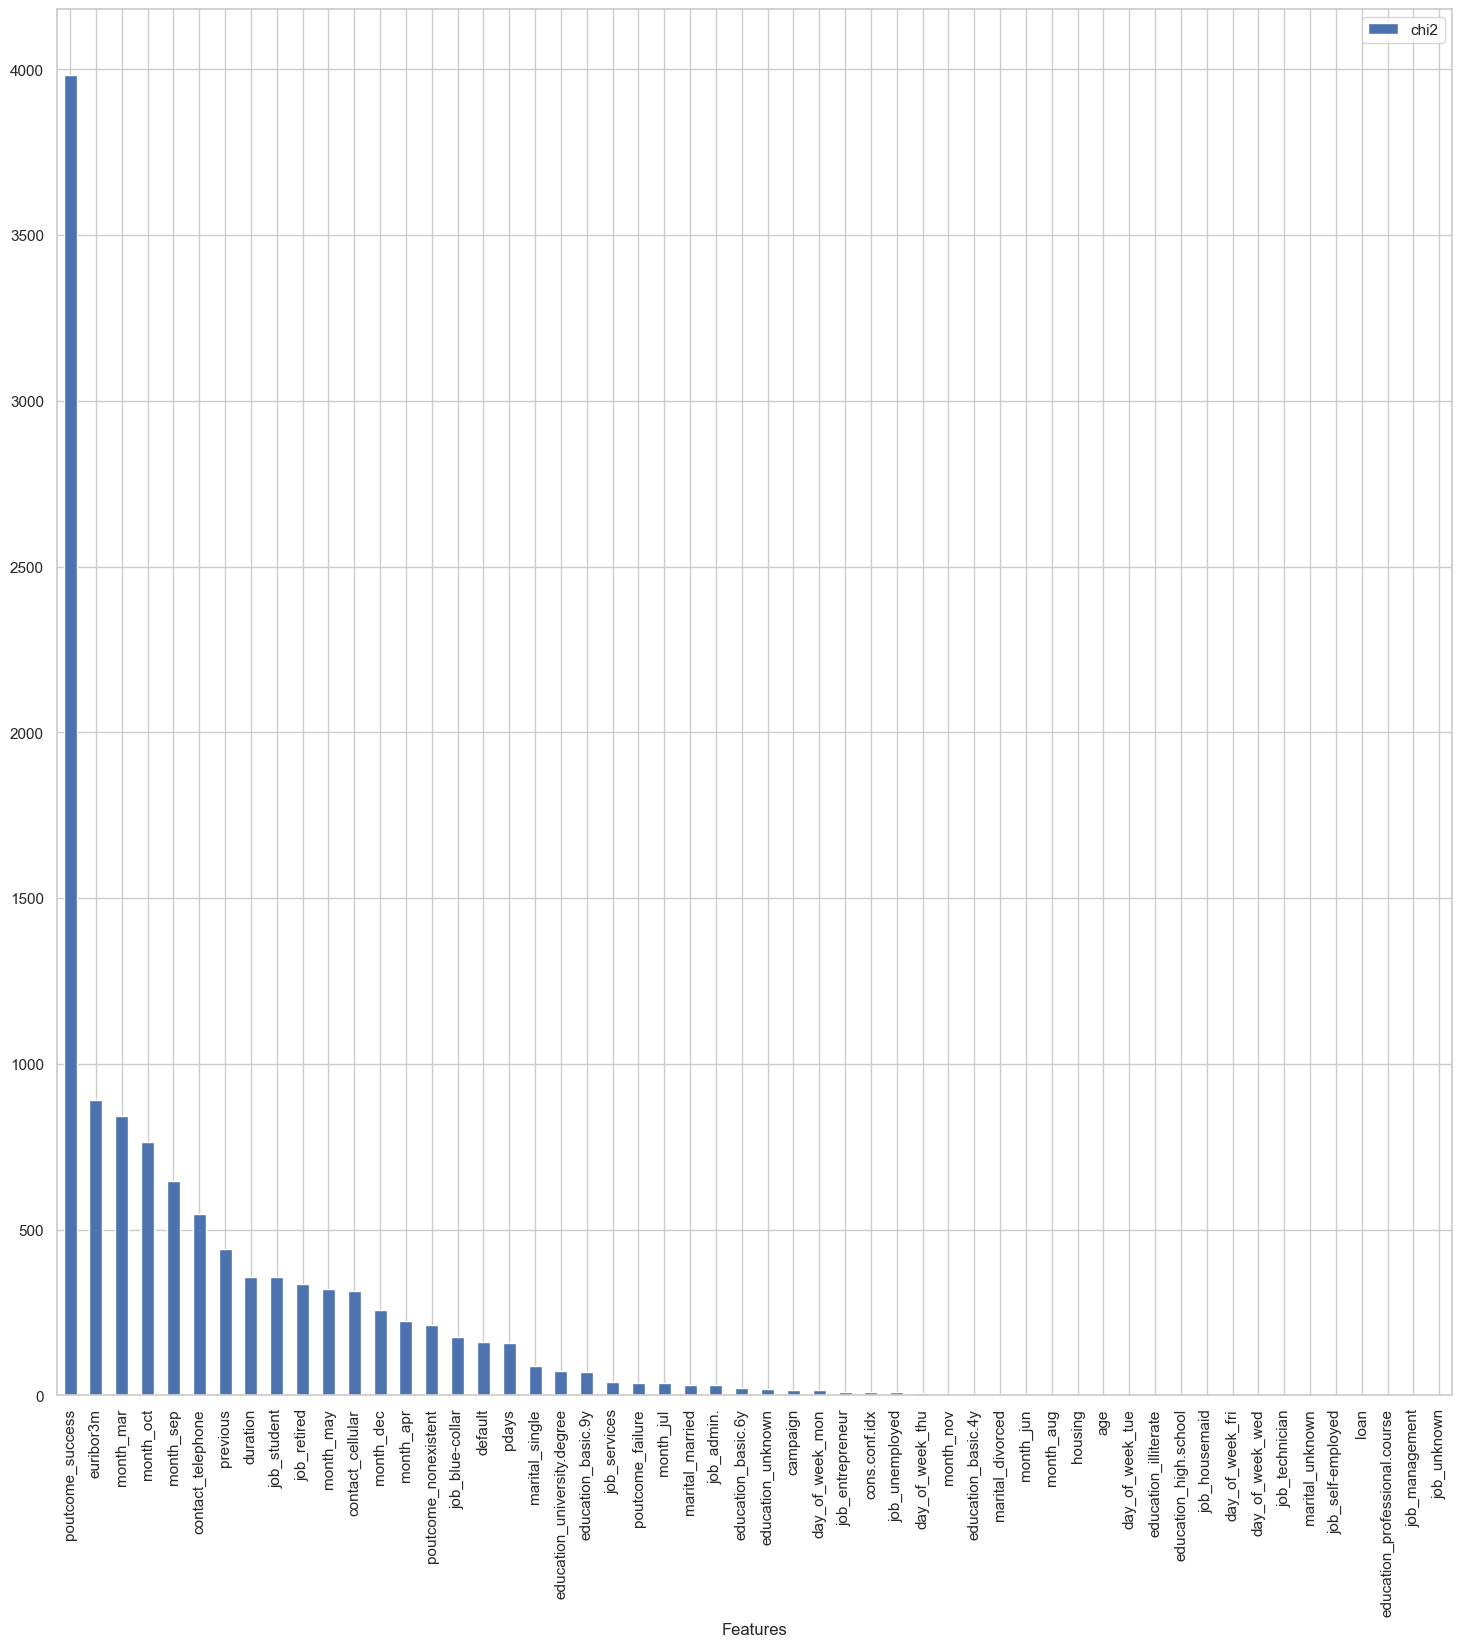

In [97]:
chi.sort_values(by = "chi2", ascending = False).set_index("Features").plot.bar(figsize = (18, 18));

In [98]:
k_best_features = pd.DataFrame(SelectKBest(chi2, k=25).fit_transform(features, labels))

In [99]:
cv2 = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 1)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(k_best_features, labels, test_size=0.2, random_state=1, stratify = labels)

## Feature Selection nad balansiranim skupom

In [111]:
labels_balansirano = df_undersampled["y"]
features_balansirano = df_undersampled.drop("y", axis=1)
features_balansirano.head()

,age,default,housing,loan,duration,campaign,pdays,previous,cons.conf.idx,euribor3m,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_cellular,contact_telephone,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,poutcome_failure,poutcome_nonexistent,poutcome_success,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,0.407407,0.0,0.0,0.0,0.143351,0.000000,1.000000,0.000000,0.368201,0.767853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.555556,0.0,1.0,0.0,0.066897,0.000000,1.000000,0.285714,0.000000,0.090002,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.283951,0.5,1.0,0.0,0.010573,0.000000,1.000000,0.000000,0.376569,0.980957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.456790,0.0,1.0,0.0,0.064457,0.090909,0.006006,0.142857,0.054393,0.080027,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.172840,0.0,1.0,0.0,0.058967,0.145455,1.000000,0.000000,0.615063,0.981410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [112]:
chivalues_balansirano = chi2(features_balansirano, labels_balansirano)[0]
chi_balansirano = pd.DataFrame(list(zip(df_undersampled.columns, chivalues_balansirano)), columns = ["Features", "chi2"])
chi_balansirano

,Features,chi2
0,age,1.258544
1,default,111.887783
2,housing,0.330906
3,loan,0.115753
4,duration,138.196881
5,campaign,11.313168
6,pdays,93.173484
7,previous,126.007295
8,cons.conf.idx,5.616519
9,euribor3m,625.892380


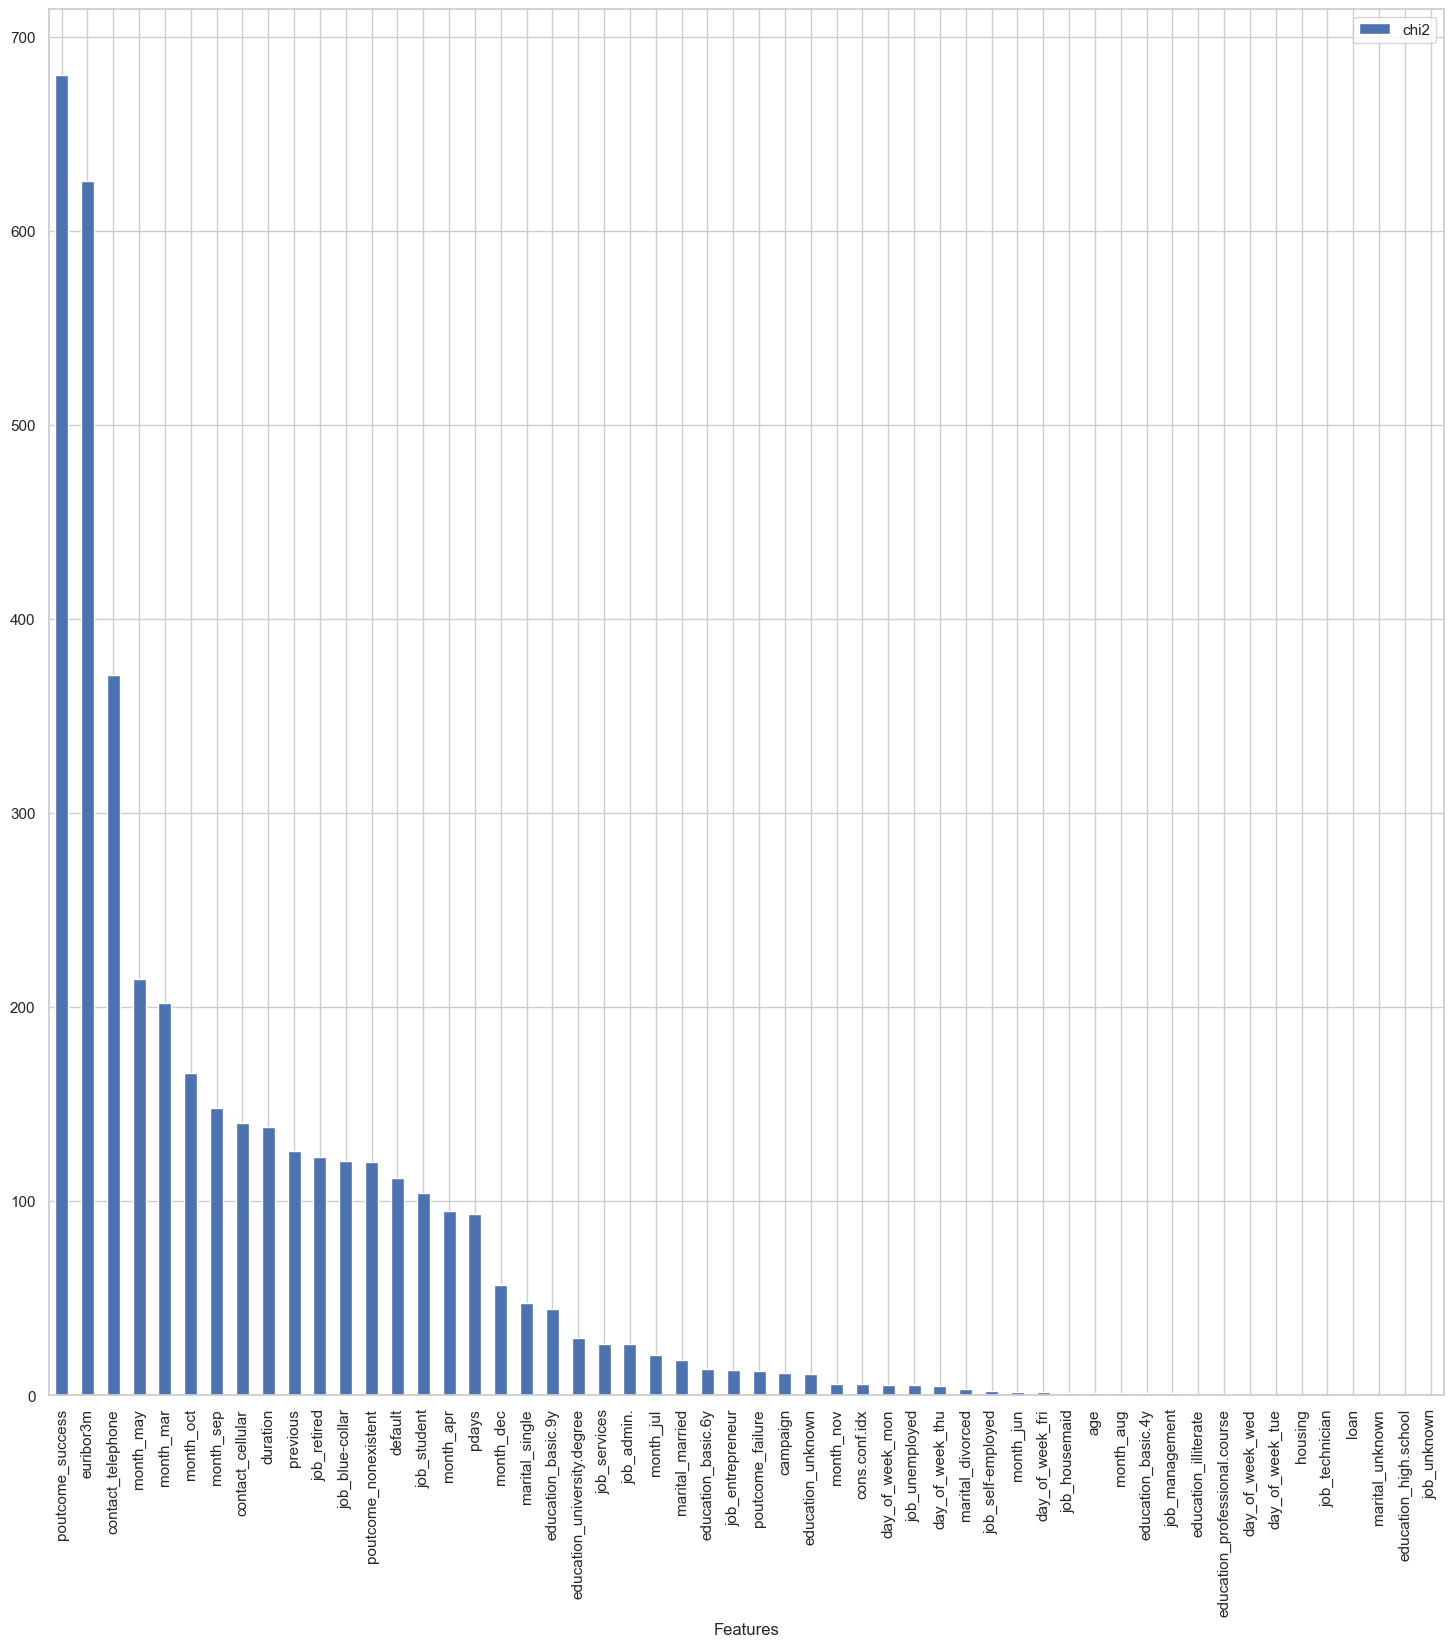

In [113]:
chi_balansirano.sort_values(by = "chi2", ascending = False).set_index("Features").plot.bar(figsize = (18, 18));

In [115]:
k_best_features_balansirano = pd.DataFrame(SelectKBest(chi2, k=25).fit_transform(features_balansirano, labels_balansirano))

In [116]:
X_train_fs_balansirano, X_test_fs_balansirano, y_train_fs_balansirano, y_test_fs_balansirano = train_test_split(k_best_features_balansirano, labels_balansirano, test_size=0.2, random_state=1, stratify = labels_balansirano)

## Logistic Regression za k-best
Nebalansirano

In [117]:
np.random.seed(42)
params7 = [
            {
                "penalty" : ['l2'], 
                "C" : [0.01, 0.1, 1.0], 
                "solver" : ["sag"], 
                "max_iter" : [100, 200]
            },
            {
                "penalty" : ['l1'], 
                "C" : [0.01, 0.1, 1.0, 10.0], 
                "solver" : ["saga"], 
                "max_iter" : [100, 200]
            }
]
model_lr_sa_parametrima_selekcija = GridSearchCV(estimator = LogisticRegression(n_jobs = -1, class_weight = "balanced"), param_grid = params7, cv = cv2, 
                   n_jobs = -1, scoring = "f1")
model_lr_sa_parametrima_selekcija.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced', n_jobs=-1),
             n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1.0], 'max_iter': [100, 200],
                          'penalty': ['l2'], 'solver': ['sag']},
                         {'C': [0.01, 0.1, 1.0, 10.0], 'max_iter': [100, 200],
                          'penalty': ['l1'], 'solver': ['saga']}],
             scoring='f1')

In [118]:
model_lr_sa_parametrima_selekcija.best_params_

{'C': 10.0, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}

In [119]:
model_lr_sa_parametrima_selekcija.best_score_

0.5897822622036537

In [120]:
f1 = f1_score(y_test, model_lr_sa_parametrima_selekcija.predict(X_test))
auc = roc_auc_score(y_test, model_lr_sa_parametrima_selekcija.predict(X_test))
acc = accuracy_score(y_test, model_lr_sa_parametrima_selekcija.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Logistic Regression nakon selekcije ficera (chi-squared)", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.577
Area under ROC on test data is : 0.858
Accuracy on test data is : 0.858


In [121]:
testing

,Algoritam,Kombinovana f mera,Područje ispod ROC krive,Accuracy
0,Logistic Regression nakon selekcije ficera (ch...,0.576505,0.857528,0.858184
1,Gaussian Naive Bayes nad balansiranim skupom,0.638414,0.713639,0.714978
2,Logistic Regression nad balansiranim skupom,0.871159,0.871261,0.871228
3,Decision Tree nad balansiranim skupom,0.839176,0.844119,0.844289
4,Random forest nad balansiranim skupom,0.898191,0.894170,0.893858
5,Gaussian Naive Bayes,0.433673,0.686908,0.865226
6,Decision Tree sa hiperparametrima,0.572250,0.819024,0.873482
7,Decision Tree bez podešavanja hiperparametara,0.545549,0.750585,0.893395
8,Logistic Regression sa parametrima,0.580762,0.859557,0.859762
9,Logistic Regression bez podešavanja hiperparam...,0.475168,0.676087,0.905051


## Logistic Regression za k-best
balansirano

In [122]:
np.random.seed(42)
model_lr_sa_parametrima_selekcija_balansirano = GridSearchCV(estimator = LogisticRegression(n_jobs = -1, class_weight = "balanced"), param_grid = params7, cv = cv2, 
                   n_jobs = -1, scoring = "f1")
model_lr_sa_parametrima_selekcija_balansirano.fit(X_train_fs_balansirano, y_train_fs_balansirano)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced', n_jobs=-1),
             n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1.0], 'max_iter': [100, 200],
                          'penalty': ['l2'], 'solver': ['sag']},
                         {'C': [0.01, 0.1, 1.0, 10.0], 'max_iter': [100, 200],
                          'penalty': ['l1'], 'solver': ['saga']}],
             scoring='f1')

In [123]:
model_lr_sa_parametrima_selekcija_balansirano.best_params_

{'C': 1.0, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}

In [124]:
model_lr_sa_parametrima_selekcija_balansirano.best_score_

0.8662139562713461

In [126]:
f1 = f1_score(y_test_fs_balansirano, model_lr_sa_parametrima_selekcija_balansirano.predict(X_test_fs_balansirano))
auc = roc_auc_score(y_test_fs_balansirano, model_lr_sa_parametrima_selekcija_balansirano.predict(X_test_fs_balansirano))
acc = accuracy_score(y_test_fs_balansirano, model_lr_sa_parametrima_selekcija_balansirano.predict(X_test_fs_balansirano))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Logistic Regression (balansirano + fs)", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.873
Area under ROC on test data is : 0.871
Accuracy on test data is : 0.871


In [127]:
testing

,Algoritam,Kombinovana f mera,Područje ispod ROC krive,Accuracy
0,Logistic Regression (balansirano + fs),0.873210,0.871228,0.871228
1,Logistic Regression nakon selekcije ficera (ch...,0.576505,0.857528,0.858184
2,Gaussian Naive Bayes nad balansiranim skupom,0.638414,0.713639,0.714978
3,Logistic Regression nad balansiranim skupom,0.871159,0.871261,0.871228
4,Decision Tree nad balansiranim skupom,0.839176,0.844119,0.844289
5,Random forest nad balansiranim skupom,0.898191,0.894170,0.893858
6,Gaussian Naive Bayes,0.433673,0.686908,0.865226
7,Decision Tree sa hiperparametrima,0.572250,0.819024,0.873482
8,Decision Tree bez podešavanja hiperparametara,0.545549,0.750585,0.893395
9,Logistic Regression sa parametrima,0.580762,0.859557,0.859762


## Decision Tree za k-best
Nebalansirano

In [128]:
np.random.seed(42)
params8 = {
            "criterion" : ["gini", "entropy"], 
            "splitter" : ["best", "random"], 
            "max_depth" : [10, 15, 20, None],
            "min_samples_split" : [3, 6], 
            "min_samples_leaf" : [2, 4],  
        }
model_dt_sa_parametrima_selekcija = GridSearchCV(estimator = DecisionTreeClassifier(class_weight = "balanced"), param_grid = params8, cv = cv2, 
                   n_jobs = -1, scoring = "f1")
model_dt_sa_parametrima_selekcija.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, None],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [3, 6],
                         'splitter': ['best', 'random']},
             scoring='f1')

In [129]:
model_dt_sa_parametrima_selekcija.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 3,
 'splitter': 'best'}

In [130]:
model_dt_sa_parametrima_selekcija.best_score_

0.5812597938331395

In [131]:
f1 = f1_score(y_test, model_lr_sa_parametrima_selekcija.predict(X_test))
auc = roc_auc_score(y_test, model_lr_sa_parametrima_selekcija.predict(X_test))
acc = accuracy_score(y_test, model_lr_sa_parametrima_selekcija.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Decision Tree nakon selekcije ficera (chi-squared)", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.577
Area under ROC on test data is : 0.858
Accuracy on test data is : 0.858


In [132]:
testing

,Algoritam,Kombinovana f mera,Područje ispod ROC krive,Accuracy
0,Decision Tree nakon selekcije ficera (chi-squa...,0.576505,0.857528,0.858184
1,Logistic Regression (balansirano + fs),0.873210,0.871228,0.871228
2,Logistic Regression nakon selekcije ficera (ch...,0.576505,0.857528,0.858184
3,Gaussian Naive Bayes nad balansiranim skupom,0.638414,0.713639,0.714978
4,Logistic Regression nad balansiranim skupom,0.871159,0.871261,0.871228
5,Decision Tree nad balansiranim skupom,0.839176,0.844119,0.844289
6,Random forest nad balansiranim skupom,0.898191,0.894170,0.893858
7,Gaussian Naive Bayes,0.433673,0.686908,0.865226
8,Decision Tree sa hiperparametrima,0.572250,0.819024,0.873482
9,Decision Tree bez podešavanja hiperparametara,0.545549,0.750585,0.893395


## Decision Tree za k-best
Balansiran dataset


In [137]:
model_dt_sa_parametrima_selekcija_balansirano = GridSearchCV(estimator = DecisionTreeClassifier(class_weight = "balanced"), param_grid = params8, cv = cv2, 
                   n_jobs = -1, scoring = "f1")
model_dt_sa_parametrima_selekcija_balansirano.fit(X_train_fs_balansirano, y_train_fs_balansirano)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, None],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [3, 6],
                         'splitter': ['best', 'random']},
             scoring='f1')

In [138]:
model_dt_sa_parametrima_selekcija_balansirano.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 3,
 'splitter': 'random'}

In [139]:
model_dt_sa_parametrima_selekcija_balansirano.best_score_

0.8724624329270301

In [140]:
f1 = f1_score(y_test_fs_balansirano, model_dt_sa_parametrima_selekcija_balansirano.predict(X_test_fs_balansirano))
auc = roc_auc_score(y_test_fs_balansirano, model_dt_sa_parametrima_selekcija_balansirano.predict(X_test_fs_balansirano))
acc = accuracy_score(y_test_fs_balansirano, model_dt_sa_parametrima_selekcija_balansirano.predict(X_test_fs_balansirano))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Decision Tree (fs + balansirano)", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.860
Area under ROC on test data is : 0.855
Accuracy on test data is : 0.855


In [141]:
testing

,Algoritam,Kombinovana f mera,Područje ispod ROC krive,Accuracy
0,Decision Tree (fs + balansirano),0.859667,0.854526,0.854526
1,Decision Tree nakon selekcije ficera (chi-squa...,0.576505,0.857528,0.858184
2,Logistic Regression (balansirano + fs),0.873210,0.871228,0.871228
3,Logistic Regression nakon selekcije ficera (ch...,0.576505,0.857528,0.858184
4,Gaussian Naive Bayes nad balansiranim skupom,0.638414,0.713639,0.714978
5,Logistic Regression nad balansiranim skupom,0.871159,0.871261,0.871228
6,Decision Tree nad balansiranim skupom,0.839176,0.844119,0.844289
7,Random forest nad balansiranim skupom,0.898191,0.894170,0.893858
8,Gaussian Naive Bayes,0.433673,0.686908,0.865226
9,Decision Tree sa hiperparametrima,0.572250,0.819024,0.873482


## Random Forest Classifier za k-best

In [142]:
np.random.seed(42)
params9 = {
            "n_estimators" : [100, 200], 
            "criterion" : ["gini", "entropy"], 
            "max_depth" : [15, 25, None],
            "min_samples_split" : [3, 6], 
            "min_samples_leaf" : [2, 4]
}
model_rf_sa_parametrima_selekcija = GridSearchCV(estimator = RandomForestClassifier(class_weight = "balanced", n_jobs = -1), param_grid = params9, cv = cv2, 
                   n_jobs = -1, scoring = "f1")
model_rf_sa_parametrima_selekcija.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [15, 25, None],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [3, 6],
                         'n_estimators': [100, 200]},
             scoring='f1')

In [144]:
model_rf_sa_parametrima_selekcija.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 200}

In [145]:
model_rf_sa_parametrima_selekcija.best_score_

0.6375230183220271

In [146]:
f1 = f1_score(y_test, model_lr_sa_parametrima_selekcija.predict(X_test))
auc = roc_auc_score(y_test, model_lr_sa_parametrima_selekcija.predict(X_test))
acc = accuracy_score(y_test, model_lr_sa_parametrima_selekcija.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Random forest nakon selekcije ficera (chi-squared)", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.577
Area under ROC on test data is : 0.858
Accuracy on test data is : 0.858


In [147]:
testing

,Algoritam,Kombinovana f mera,Područje ispod ROC krive,Accuracy
0,Random forest nakon selekcije ficera (chi-squa...,0.576505,0.857528,0.858184
1,Decision Tree (fs + balansirano),0.859667,0.854526,0.854526
2,Decision Tree nakon selekcije ficera (chi-squa...,0.576505,0.857528,0.858184
3,Logistic Regression (balansirano + fs),0.873210,0.871228,0.871228
4,Logistic Regression nakon selekcije ficera (ch...,0.576505,0.857528,0.858184
5,Gaussian Naive Bayes nad balansiranim skupom,0.638414,0.713639,0.714978
6,Logistic Regression nad balansiranim skupom,0.871159,0.871261,0.871228
7,Decision Tree nad balansiranim skupom,0.839176,0.844119,0.844289
8,Random forest nad balansiranim skupom,0.898191,0.894170,0.893858
9,Gaussian Naive Bayes,0.433673,0.686908,0.865226


## Random forest classifier za k-best
Balansirano

In [149]:
model_rf_sa_parametrima_selekcija_balansirano = GridSearchCV(estimator = RandomForestClassifier(class_weight = "balanced", n_jobs = -1), param_grid = params9, cv = cv2, 
                   n_jobs = -1, scoring = "f1")
model_rf_sa_parametrima_selekcija_balansirano.fit(X_train_fs_balansirano, y_train_fs_balansirano)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [15, 25, None],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [3, 6],
                         'n_estimators': [100, 200]},
             scoring='f1')

In [150]:
model_rf_sa_parametrima_selekcija_balansirano.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'n_estimators': 100}

In [151]:
model_rf_sa_parametrima_selekcija_balansirano.best_score_

0.8902077926080569

In [152]:
f1 = f1_score(y_test_fs_balansirano, model_rf_sa_parametrima_selekcija_balansirano.predict(X_test_fs_balansirano))
auc = roc_auc_score(y_test_fs_balansirano, model_rf_sa_parametrima_selekcija_balansirano.predict(X_test_fs_balansirano))
acc = accuracy_score(y_test_fs_balansirano, model_rf_sa_parametrima_selekcija_balansirano.predict(X_test_fs_balansirano))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Random forest (fs + balansirano)", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.892
Area under ROC on test data is : 0.886
Accuracy on test data is : 0.886


In [153]:
testing

,Algoritam,Kombinovana f mera,Područje ispod ROC krive,Accuracy
0,Random forest (fs + balansirano),0.892182,0.886315,0.886315
1,Random forest nakon selekcije ficera (chi-squa...,0.576505,0.857528,0.858184
2,Decision Tree (fs + balansirano),0.859667,0.854526,0.854526
3,Decision Tree nakon selekcije ficera (chi-squa...,0.576505,0.857528,0.858184
4,Logistic Regression (balansirano + fs),0.873210,0.871228,0.871228
5,Logistic Regression nakon selekcije ficera (ch...,0.576505,0.857528,0.858184
6,Gaussian Naive Bayes nad balansiranim skupom,0.638414,0.713639,0.714978
7,Logistic Regression nad balansiranim skupom,0.871159,0.871261,0.871228
8,Decision Tree nad balansiranim skupom,0.839176,0.844119,0.844289
9,Random forest nad balansiranim skupom,0.898191,0.894170,0.893858


## Ada Boost Classifier